# Regression Project for Sales of Store 

# Importing some of the basic libraries 

In [1]:
import matplotlib.pyplot as plt             
from tabulate import tabulate               
import matplotlib as mat                   
import seaborn as sns                       
import pandas as pd                         
import numpy as np   
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

# Dataset 

In [2]:
data_df=pd.read_csv("DS3_C6_S1_Regression_StoreSales_Data_Project.csv")
data_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploring the Data 

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


### Describe 

In [4]:
data_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Shape 

In [5]:
data_df.shape

(14204, 12)

### Columns 

In [6]:
data_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Missing Values 

In [7]:
data_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

## Not Filling the missing value via the fillna , we will use these rows as our validation data for our model to predict.

So we would be working on only the other rows .

## Setting the index 

In [8]:
data_df=data_df.set_index('Item_Identifier')
data_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Categorizing the Data 

In [9]:
cat=[]
con=[]

for i in data_df.columns:
    if data_df[i].nunique()<50:
        cat.append(i)
    else:
        con.append(i)

print(tabulate({"Categorical":cat,
                "Continuous": con}, headers = ["categorical", "continuous"]))           

categorical                continuous
-------------------------  -----------------
Item_Fat_Content           Item_Weight
Item_Type                  Item_Visibility
Outlet_Identifier          Item_MRP
Outlet_Establishment_Year  Item_Outlet_Sales
Outlet_Size
Outlet_Location_Type
Outlet_Type


In [10]:
for i in data_df.columns:
    print(i,':',data_df[i].nunique())

Item_Weight : 415
Item_Fat_Content : 2
Item_Visibility : 13010
Item_Type : 16
Item_MRP : 8052
Outlet_Identifier : 10
Outlet_Establishment_Year : 9
Outlet_Size : 3
Outlet_Location_Type : 3
Outlet_Type : 4
Item_Outlet_Sales : 3493


In [11]:
for i in data_df.columns:
    if data_df[i].nunique()<50:
        print(i,':',data_df[i].unique())

Item_Fat_Content : ['Low Fat' 'Regular']
Item_Type : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier : ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Establishment_Year : [1999 2009 1998 1987 1985 2002 2007 1997 2004]
Outlet_Size : ['Medium' 'High' 'Small']
Outlet_Location_Type : ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


### These Data Can be encoded after EDA so these values are passed in model 

# EDA 

## Categorical Data 

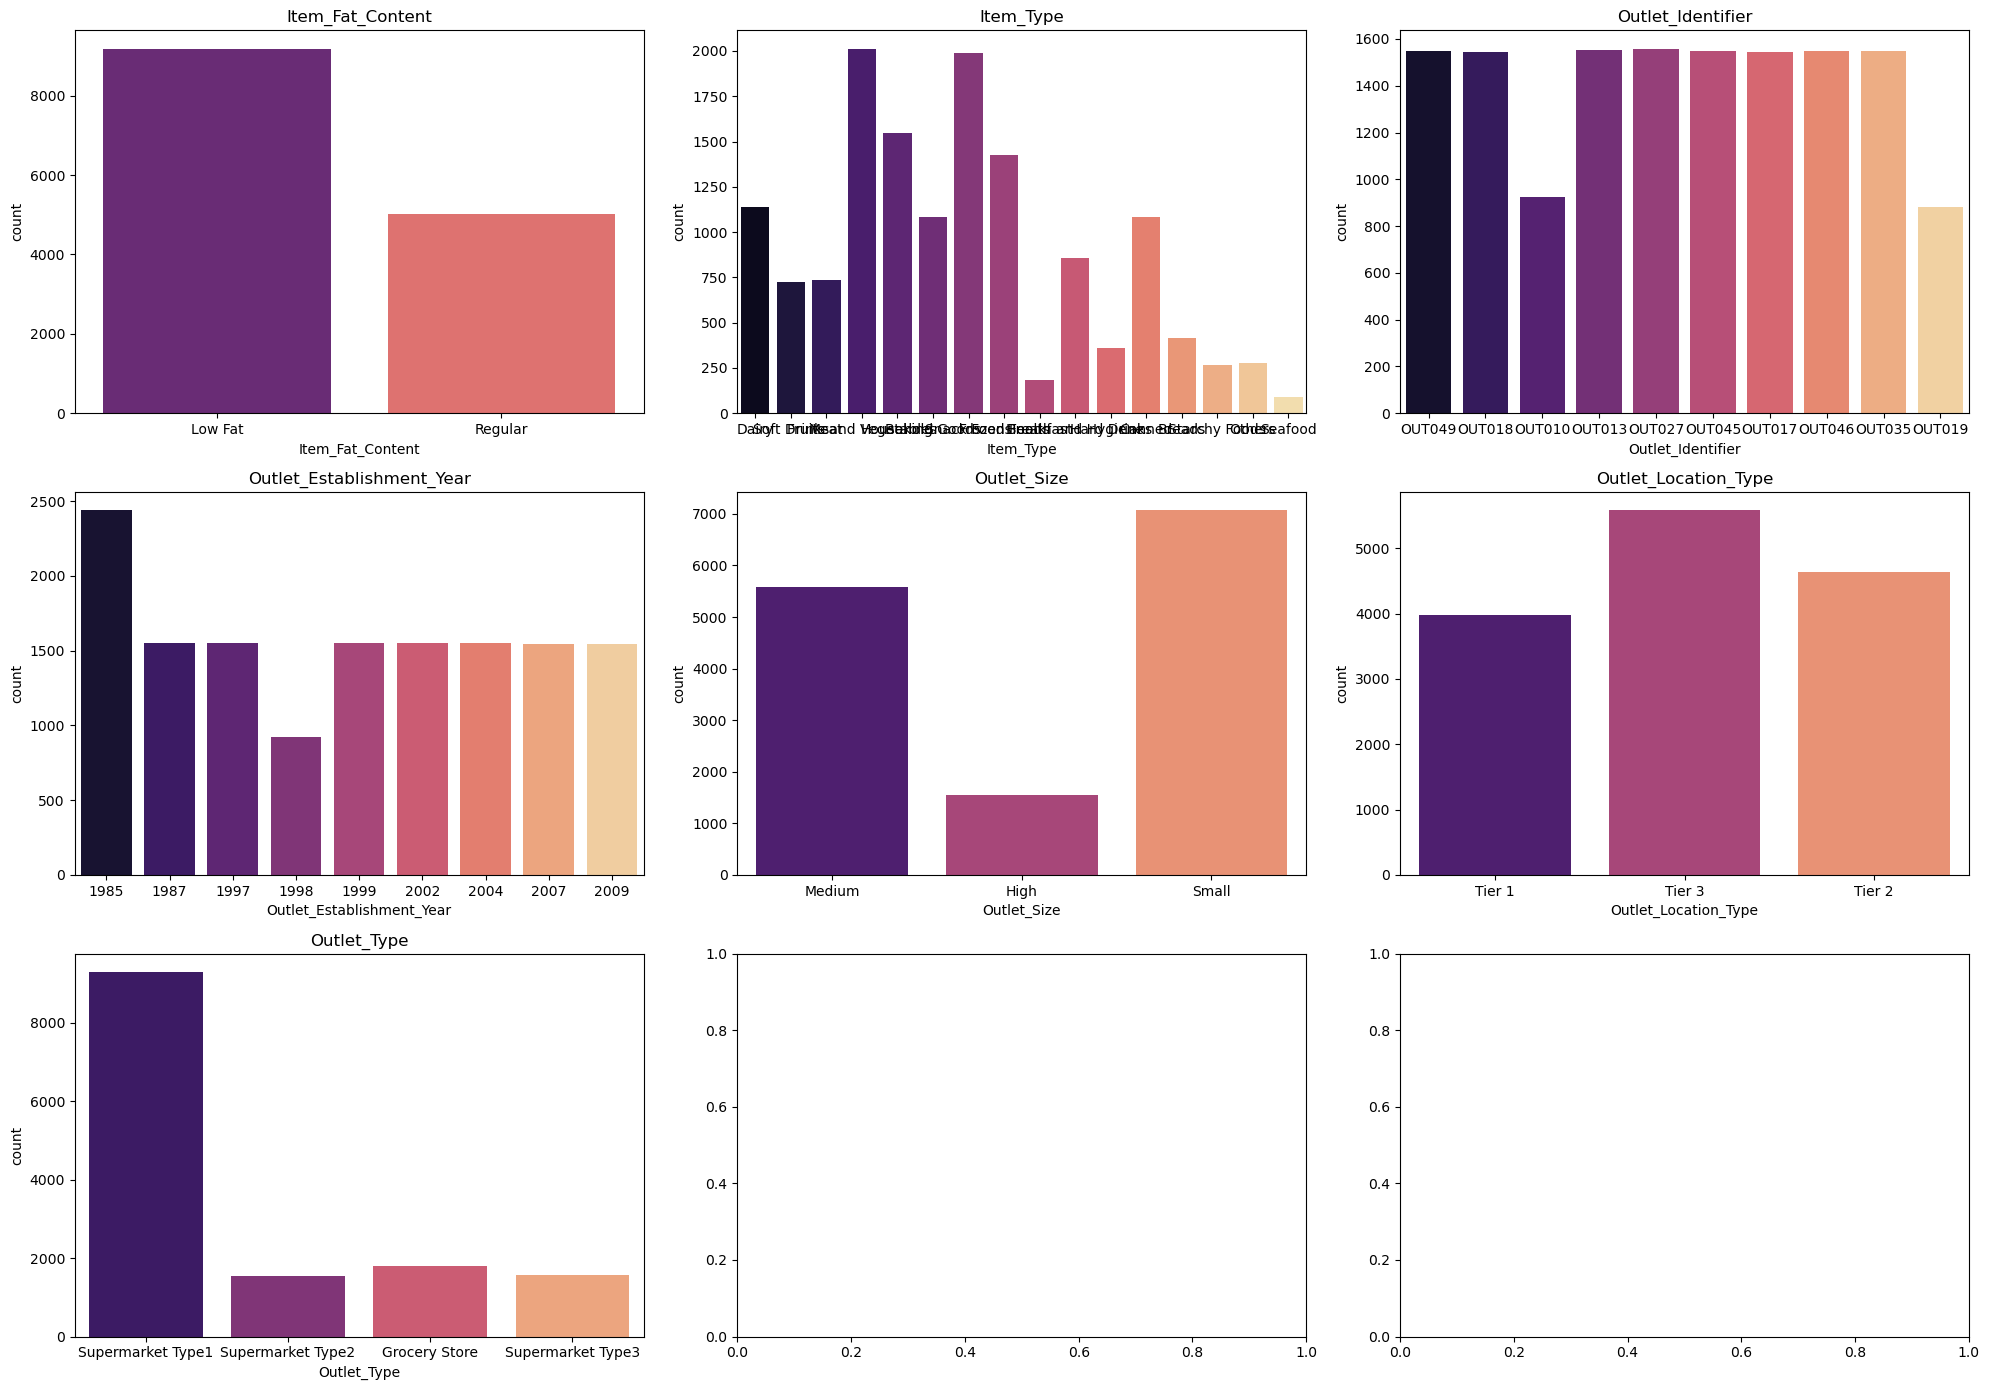

In [12]:
r=3
c=int(len(cat)/r)+1

figs,axes =plt.subplots(c,r,figsize=(20,14),tight_layout=True)

for i , ax in zip(cat,axes.flatten()[:len(cat)]):
    sns.countplot(data=data_df,x=data_df[i],palette='magma',ax=ax)
    #ax.set_xlabel(i)
    ax.set_title(i)
plt.show()    


# Continuos Data 

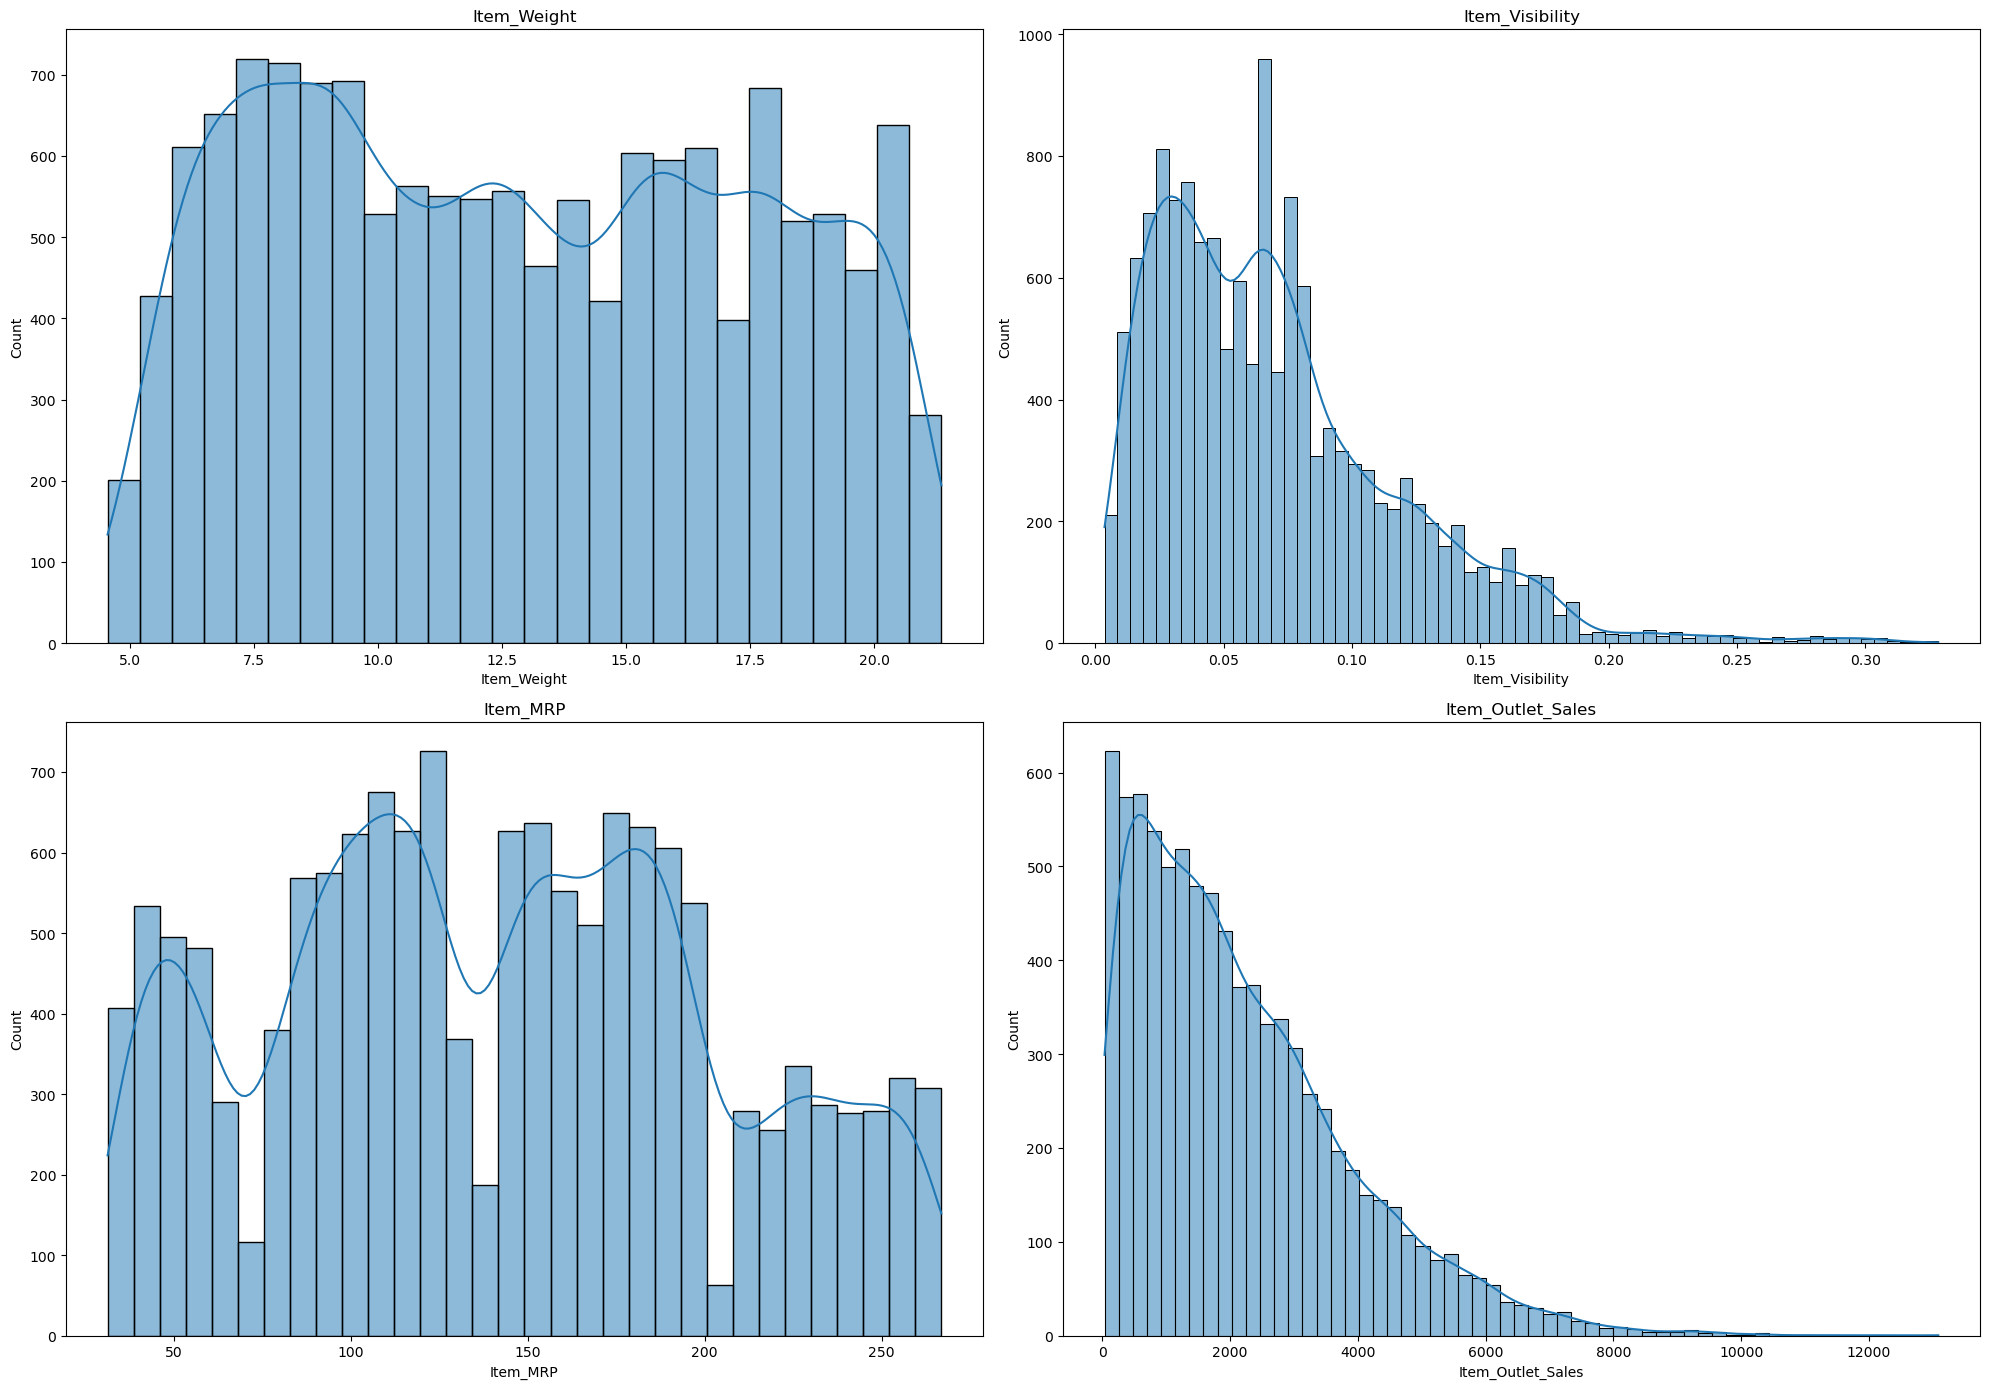

In [13]:
r=2
c=int(len(con)/r)

figs,axes =plt.subplots(c,r,figsize=(20,14),tight_layout=True)

for i , ax in zip(con,axes.flatten()[:len(con)]):
    sns.histplot(data=data_df,x=data_df[i].values,palette='magma',ax=ax,kde=True)
    ax.set_xlabel(i)
    ax.set_title(i)
plt.show()  

## $$\;\;\;\; Interactive \ Univariate \ Analysis \ of \ Categorical \ Variables$$

In [14]:
from ipywidgets import interact

In [15]:
def cat_info(col): 
    print(f"Unique values in {data_df.columns[col]} are: {data_df.iloc[:,col].unique()}") 
    print(f"Mode of {data_df.columns[col]} is {data_df.iloc[:,col].mode()[0]}") 
    print(f"Number of missing values in {data_df.columns[col]} is {data_df.iloc[:,col].isnull().sum()}") 
    if data_df.iloc[:,col].isnull().sum() > 0:  
        print(f"\nThere are null values in the {data_df.columns[col]} column")

In [16]:
data_df2=data_df.select_dtypes('object')
def cat_vis(col,palette='magma'):
    cat_info(col)
    
    sns.countplot(data=data_df2,x=data_df2.iloc[:,col],palette=palette)
    plt.title(data_df2.columns[col])
    plt.show()

interact(cat_vis,col=(0,len(data_df2.columns),1),palette=['magma','viridis'],columns=[cat])    

interactive(children=(IntSlider(value=3, description='col', max=6), Dropdown(description='palette', options=('…

<function __main__.cat_vis(col, palette='magma')>

In [17]:
def catt_info(col): 
    print(f"Unique values in {col} are: {data_df[col].unique()}") 
    print(f"Mode of {col} is {data_df[col].mode()[0]}")  
    print(f"Number of missing values in {col} is {data_df[col].isnull().sum()}") 
    if data_df[col].isnull().sum() > 0: 
        print(f"\nThere are null values in the {col} column")

# 1. Analysis of Item_Fat_Content 

In [18]:
catt_info("Item_Fat_Content")

Unique values in Item_Fat_Content are: ['Low Fat' 'Regular']
Mode of Item_Fat_Content is Low Fat
Number of missing values in Item_Fat_Content is 0


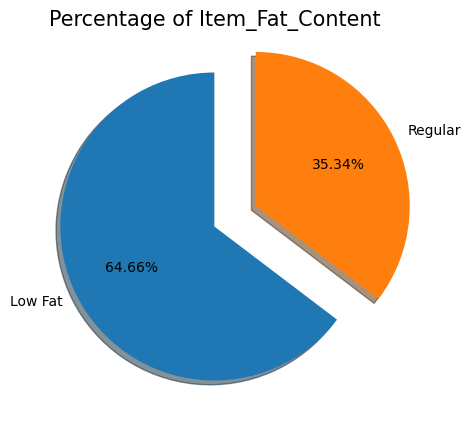

In [19]:
explode=[0,0.3]
plt.figure(figsize=(15,5))
plt.title('Percentage of Item_Fat_Content',fontsize=15)
plt.pie(data_df['Item_Fat_Content'].value_counts(),labels=data_df['Item_Fat_Content'].unique(),autopct='%0.2f%%',explode=explode,shadow=True,startangle=90);

### The Fat Content of the items are low considering health or targeting people who are opting for a healthier lifestyle and vareity in product for differnt customer segment.

# 2. Analysis of Item_type

In [20]:
catt_info("Item_Type")

Unique values in Item_Type are: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Mode of Item_Type is Fruits and Vegetables
Number of missing values in Item_Type is 0


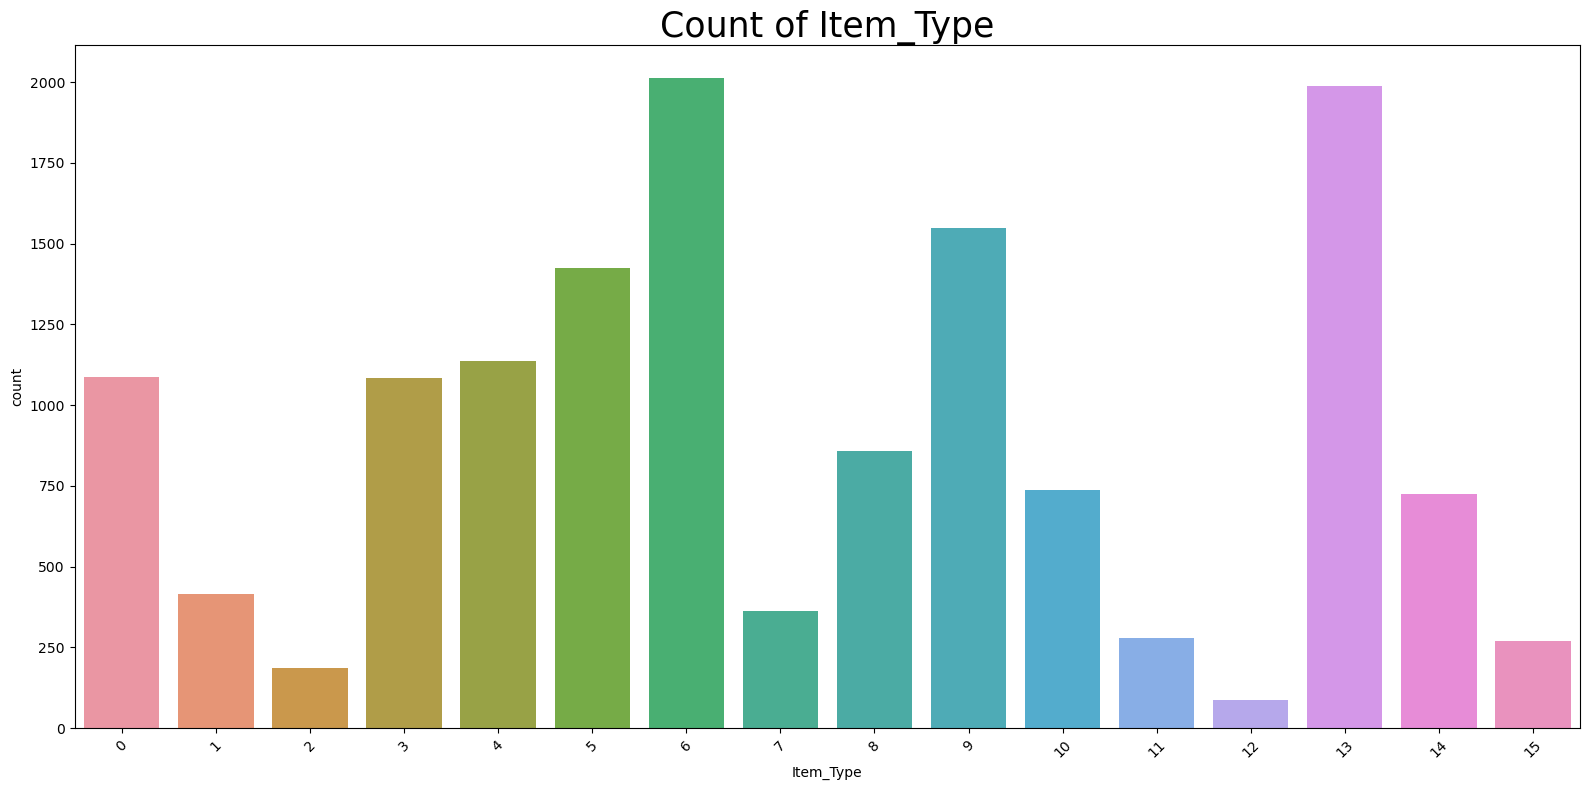

In [170]:
plt.figure(figsize=(16,8))
plt.title('Count of Item_Type',fontsize=25)
sns.countplot(data=data_df,x=data_df['Item_Type'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Here we can see that Fruits and vegetables have the highest count in Item Type of dataset , again indicating towards healthier peoples & wide range of products to attract all sorts of customers .

# 3. Analysis of Outlet_Identifier

In [22]:
catt_info("Outlet_Identifier")

Unique values in Outlet_Identifier are: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Mode of Outlet_Identifier is OUT027
Number of missing values in Outlet_Identifier is 0


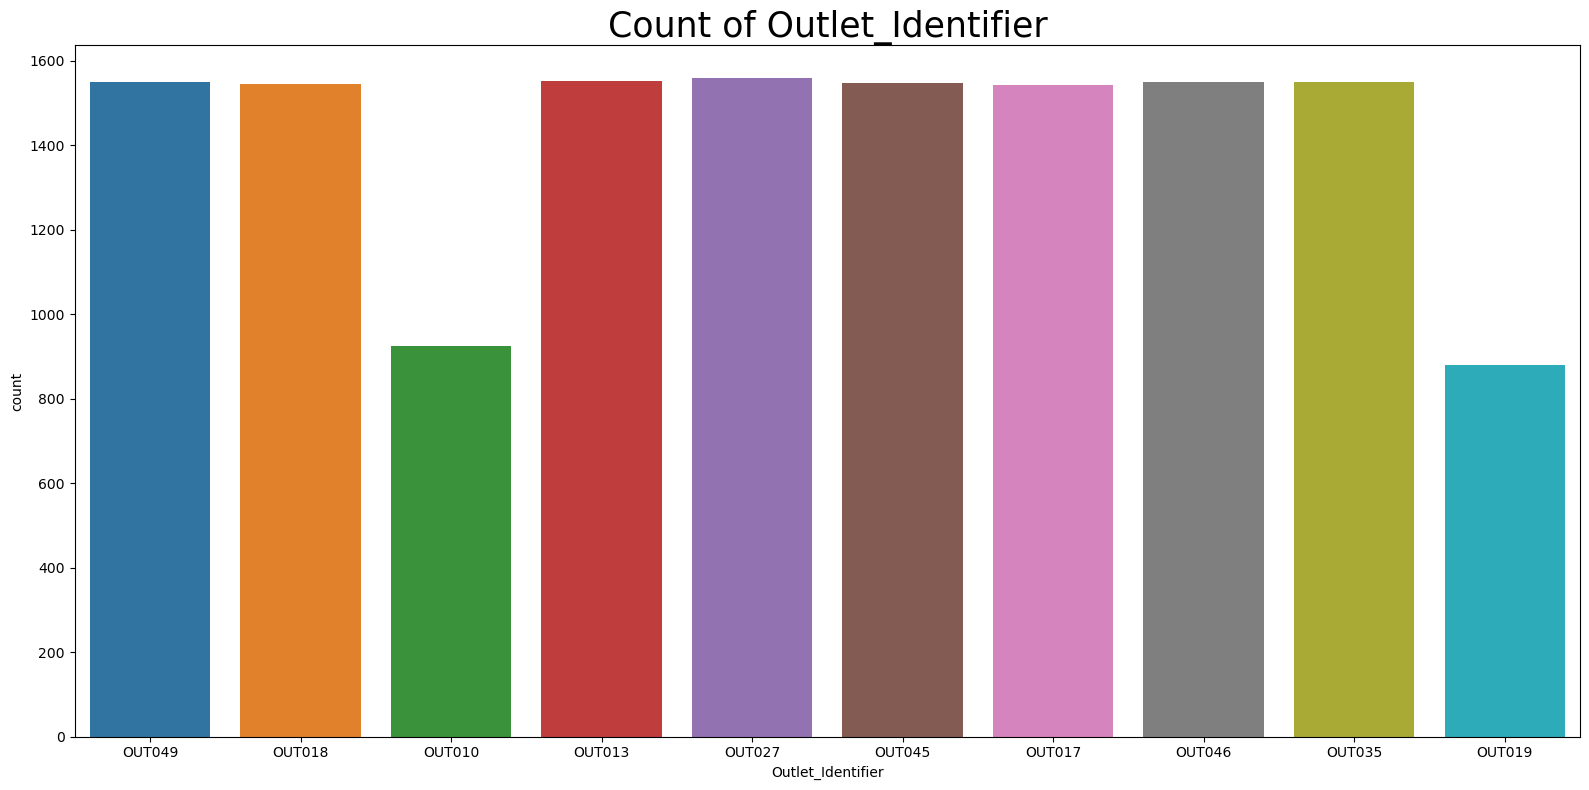

In [23]:
plt.figure(figsize=(16,8))
plt.title('Count of Outlet_Identifier',fontsize=25)
sns.countplot(data=data_df,x=data_df['Outlet_Identifier'])
plt.tight_layout()
plt.show()

### Except for the OUT019 and OUT018 , all types of outlets have equvalent count 

# 4. Analysis of Outlet_Establishment_Year

In [24]:
catt_info("Outlet_Establishment_Year")

Unique values in Outlet_Establishment_Year are: [1999 2009 1998 1987 1985 2002 2007 1997 2004]
Mode of Outlet_Establishment_Year is 1985
Number of missing values in Outlet_Establishment_Year is 0


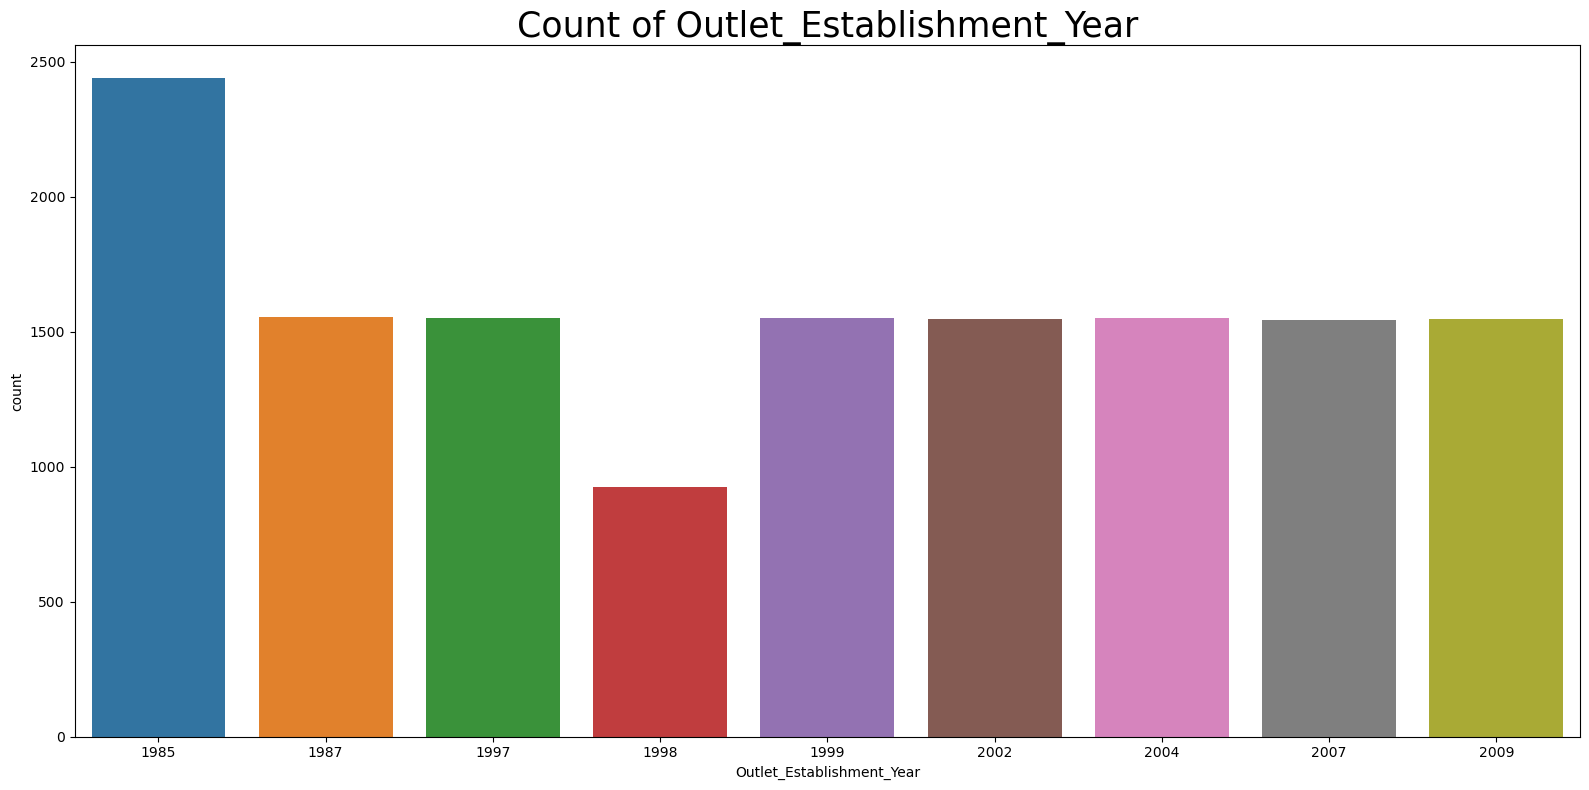

In [25]:
plt.figure(figsize=(16,8))
plt.title('Count of Outlet_Establishment_Year',fontsize=25)
sns.countplot(data=data_df,x=data_df['Outlet_Establishment_Year'])
plt.tight_layout()
plt.show()

# 5.  Analysis of Outlet_Size  

In [26]:
catt_info('Outlet_Size')

Unique values in Outlet_Size are: ['Medium' 'High' 'Small']
Mode of Outlet_Size is Small
Number of missing values in Outlet_Size is 0


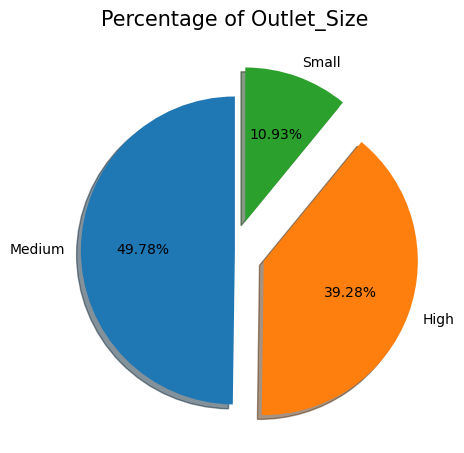

In [27]:
explode=[0,0.2,0.2]
plt.figure(figsize=(15,5))
plt.title('Percentage of Outlet_Size\n',fontsize=15)
plt.pie(data_df['Outlet_Size'].value_counts(),labels=data_df['Outlet_Size'].unique(),autopct='%0.2f%%',explode=explode,shadow=True,startangle=90);

### The Outlet Sizes are generally mdedium or high to accomodates more items and particularly medium to avoid space wastage and maximum utilisation .

# 6. Analysis of Outlet_Location_Type

In [28]:
catt_info('Outlet_Location_Type')

Unique values in Outlet_Location_Type are: ['Tier 1' 'Tier 3' 'Tier 2']
Mode of Outlet_Location_Type is Tier 3
Number of missing values in Outlet_Location_Type is 0


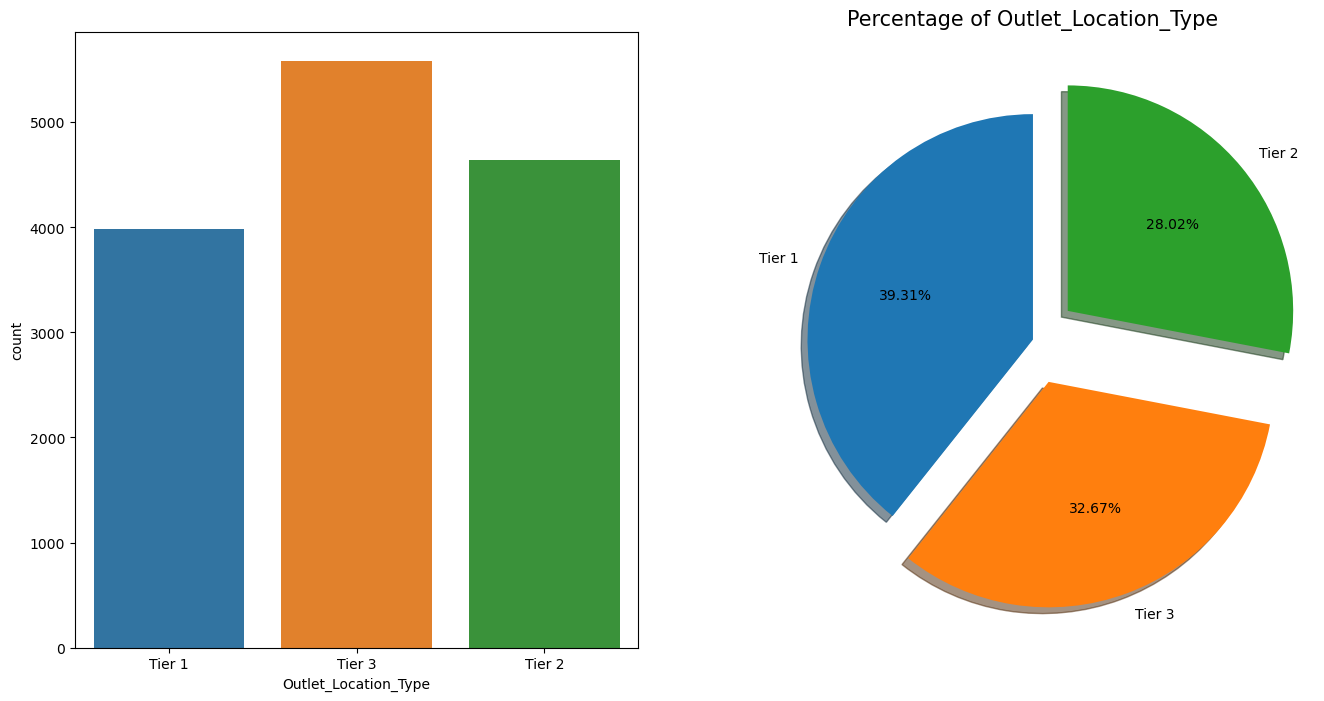

In [29]:
explode=[0,0.2,0.2]
figs,axes = plt.subplots(1,2,figsize=(16,8))
#plt.figure(figsize=(15,5))
sns.countplot(data=data_df,x=data_df['Outlet_Location_Type'],ax=axes[0])
plt.title('Percentage of Outlet_Location_Type\n',fontsize=15)
plt.pie(data_df['Outlet_Location_Type'].value_counts(),labels=data_df['Outlet_Location_Type'].unique(),autopct='%0.2f%%',explode=explode,shadow=True,startangle=90);

### The more number of stores are in tier1 city to attrack more cutsomers and to boost bussiness .

# 7. Analysis of Outlet_Type

In [30]:
catt_info('Outlet_Type')

Unique values in Outlet_Type are: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Mode of Outlet_Type is Supermarket Type1
Number of missing values in Outlet_Type is 0


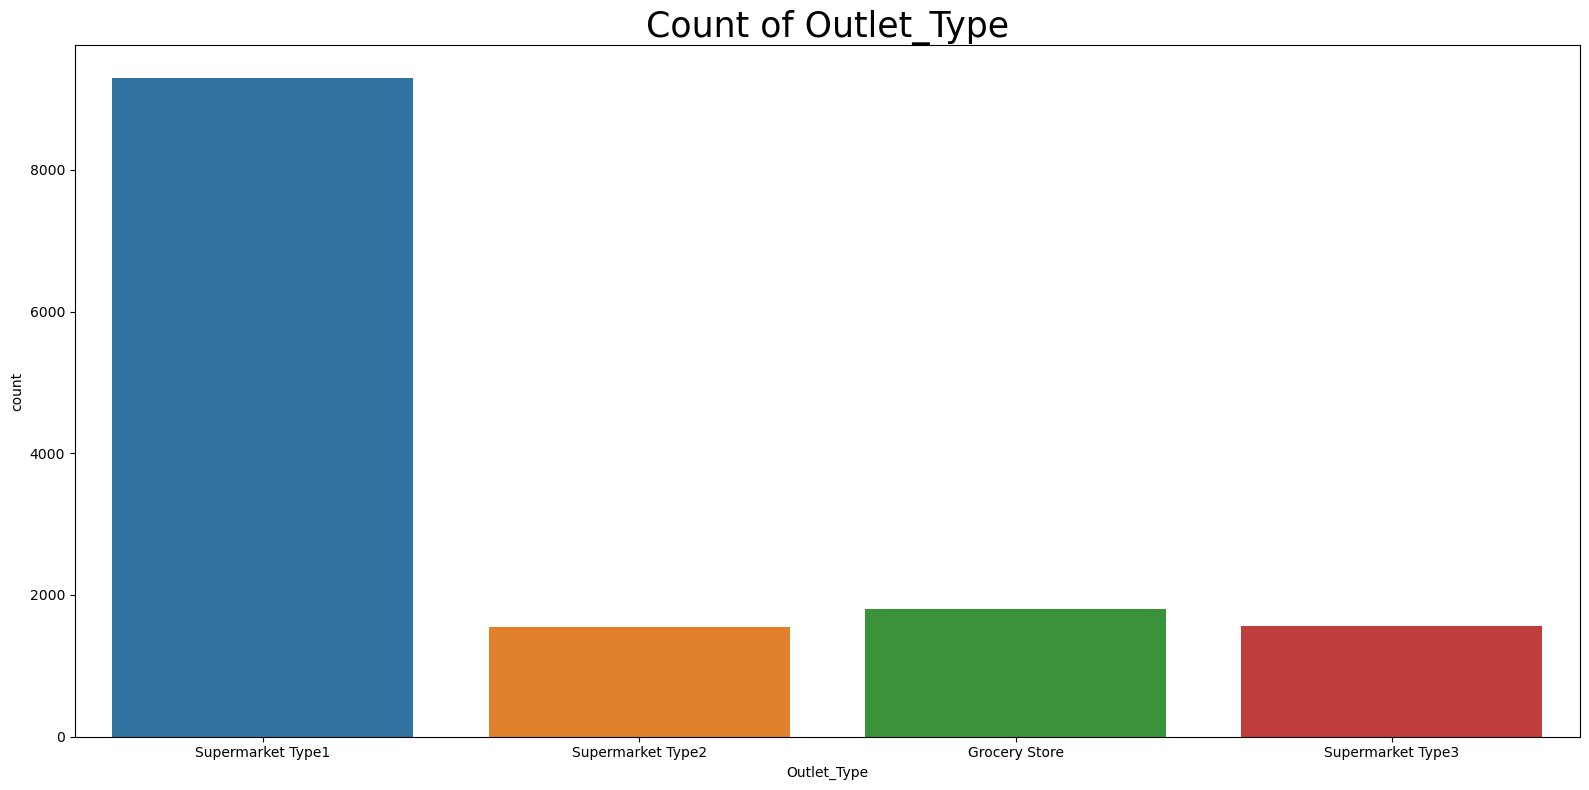

In [31]:
plt.figure(figsize=(16,8))
plt.title('Count of Outlet_Type',fontsize=25)
sns.countplot(data=data_df,x=data_df['Outlet_Type'])
plt.tight_layout()
plt.show()

### They are having more supermarket stores to attract every types of customers and provide variety and creating needs for the customers .

## $$\;\;\;\;\;\;Univariate \ Analysis \ of \ Numerical(Continuous) \ Variables$$

In [32]:
def num_info(col):
    print(f"The mean of the {data_df.columns[col]} is {data_df[data_df.columns[col]].mean()}")
    print(f"The median of the {data_df.columns[col]} is {data_df[data_df.columns[col]].median()}")
    print(f"The standard deviation of the {data_df.columns[col]} is {data_df[data_df.columns[col]].std()}")
    print(f"Number of missing values in the {data_df.columns[col]} is {data_df[data_df.columns[col]].isnull().sum()}")

In [33]:
data_df1=data_df.select_dtypes(['float64','int64'])
def con_vis(col,palette='magma'):
    num_info(col)
    data_df1=data_df.select_dtypes(['float64','int64'])
    sns.boxplot(data=data_df1,x=data_df.iloc[:,col],palette=palette)
    plt.title(data_df.columns[col])
    plt.show()

interact(con_vis,col=(0,len(data_df1.columns),1),palette=['magma','viridis'],columns=[cat])    

interactive(children=(IntSlider(value=2, description='col', max=5), Dropdown(description='palette', options=('…

<function __main__.con_vis(col, palette='magma')>

# Numerical Analysis 

In [34]:
def num_infoo(col):
    print(f"The mean of the {col} is {data_df[col].mean()}")
    print(f"The median of the {col} is {data_df[col].median()}")
    print(f"The standard deviation of the {col} is {data_df[col].std()}")
    print(f"Number of missing values in the {col} is {data_df[col].isnull().sum()}")

# 1. Analysis of Item_weight

In [35]:
num_infoo('Item_Weight')

The mean of the Item_Weight is 12.793380385807628
The median of the Item_Weight is 12.6
The standard deviation of the Item_Weight is 4.6517158036609825
Number of missing values in the Item_Weight is 0


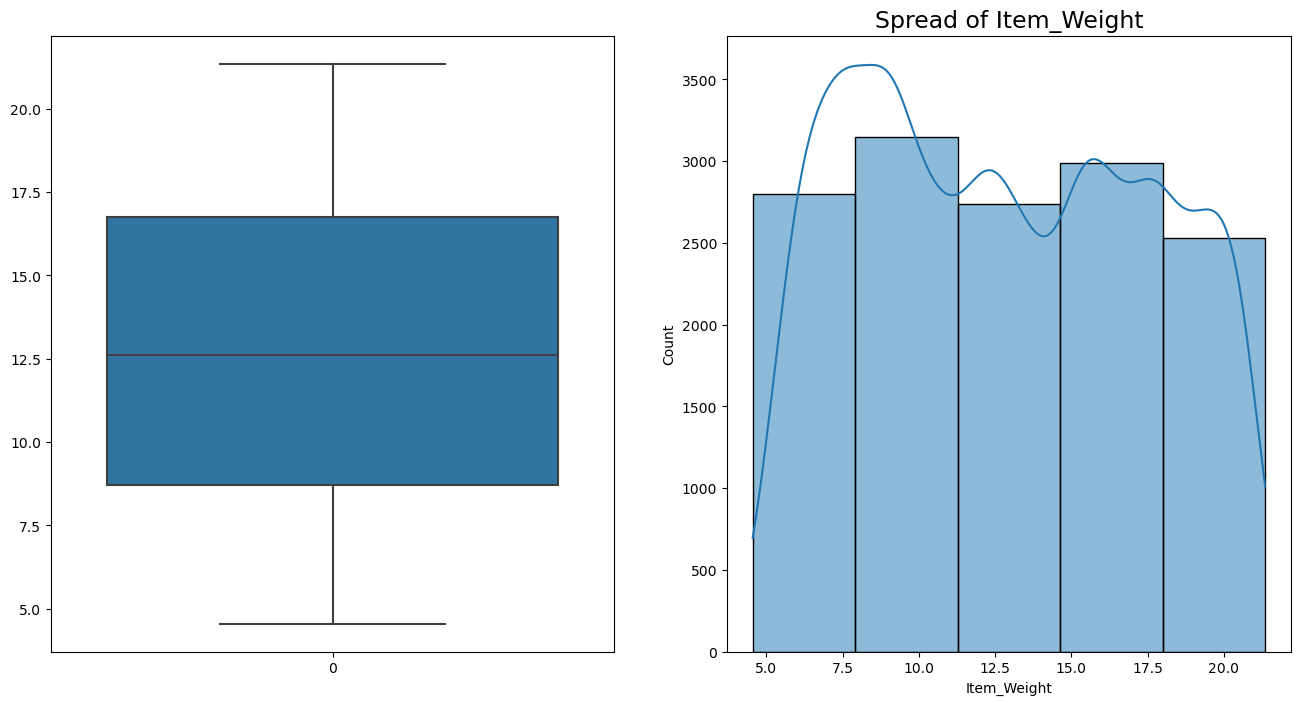

In [36]:
figs,axes = plt.subplots(1,2,figsize=(16,8))
plt.title('Spread of Item_Weight',fontsize=17)
sns.boxplot(data_df['Item_Weight'],ax=axes[0])
sns.histplot(data_df['Item_Weight'],kde=True,ax=axes[1],bins=5)
plt.show()

# 2. Analysis of Item_Visibility

In [37]:
num_infoo('Item_Visibility')

The mean of the Item_Visibility is 0.07030079341671354
The median of the Item_Visibility is 0.062347052
The standard deviation of the Item_Visibility is 0.048621198376929964
Number of missing values in the Item_Visibility is 0


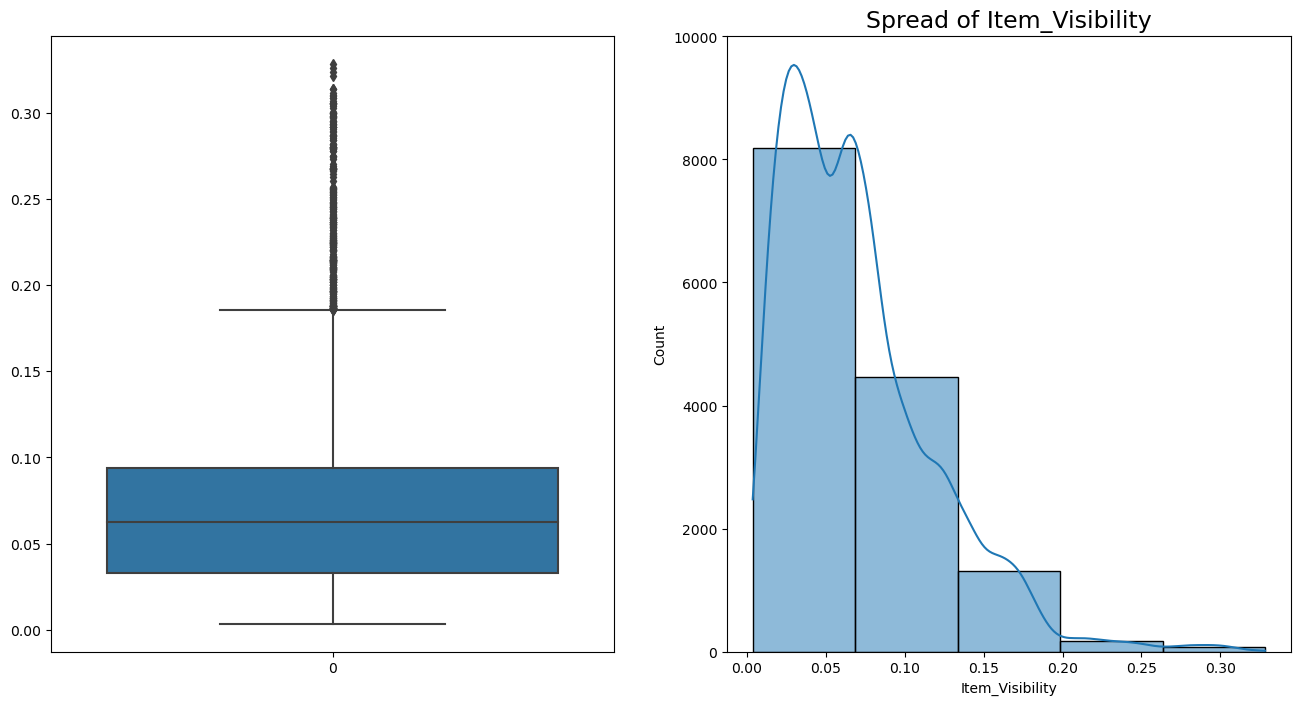

In [38]:
figs,axes = plt.subplots(1,2,figsize=(16,8))
plt.title('Spread of Item_Visibility',fontsize=17)
sns.boxplot(data_df['Item_Visibility'],ax=axes[0])
sns.histplot(data_df['Item_Visibility'],kde=True,ax=axes[1],bins=5)
plt.show()

### The Visibility of items are quite less 

# 3. Analysis of  Item_MRP

In [39]:
num_infoo('Item_MRP')

The mean of the Item_MRP is 141.00497725992656
The median of the Item_MRP is 142.247
The standard deviation of the Item_MRP is 62.086938014763994
Number of missing values in the Item_MRP is 0


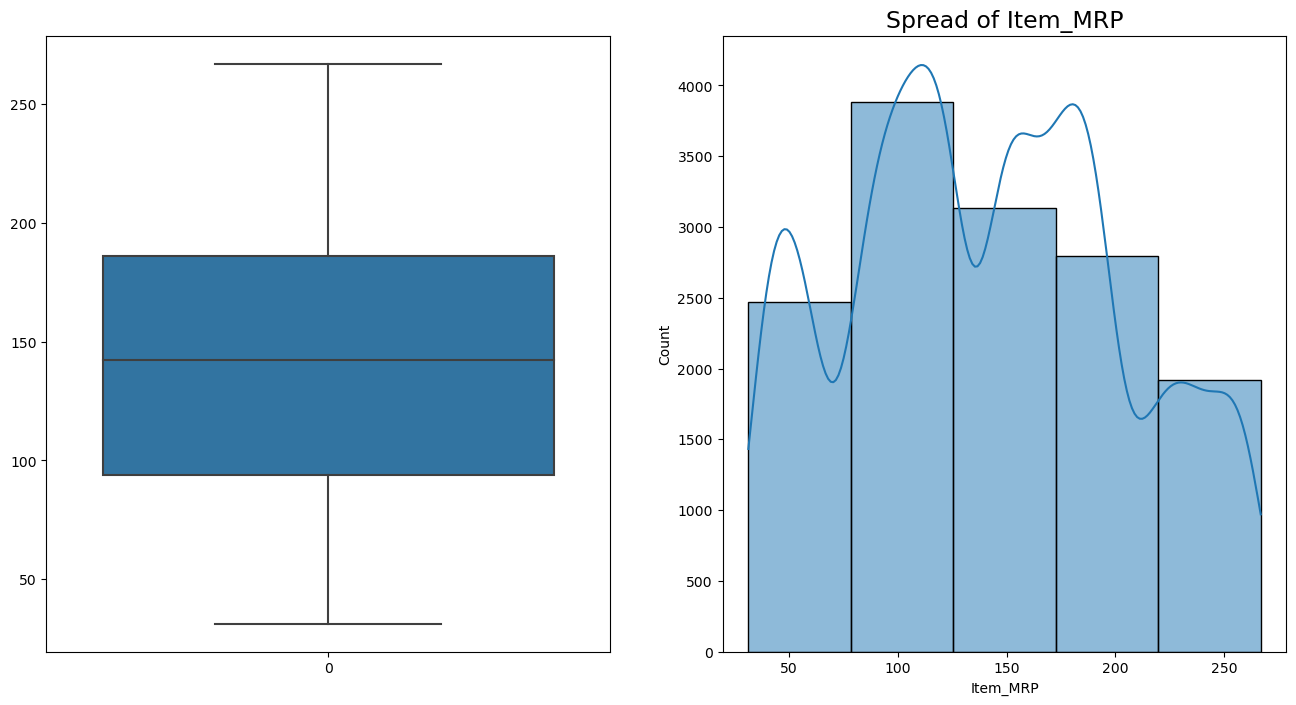

In [40]:
figs,axes = plt.subplots(1,2,figsize=(16,8))
plt.title('Spread of Item_MRP',fontsize=17)
sns.boxplot(data_df['Item_MRP'],ax=axes[0])
sns.histplot(data_df['Item_MRP'],kde=True,ax=axes[1],bins=5)
plt.show()

### The price varies betweeen 130-180.

# 4. Analysis of  Item_Outlet_Sales

In [41]:
num_infoo('Item_Outlet_Sales')

The mean of the Item_Outlet_Sales is 2181.2889135750365
The median of the Item_Outlet_Sales is 1794.331
The standard deviation of the Item_Outlet_Sales is 1706.499615733832
Number of missing values in the Item_Outlet_Sales is 5681


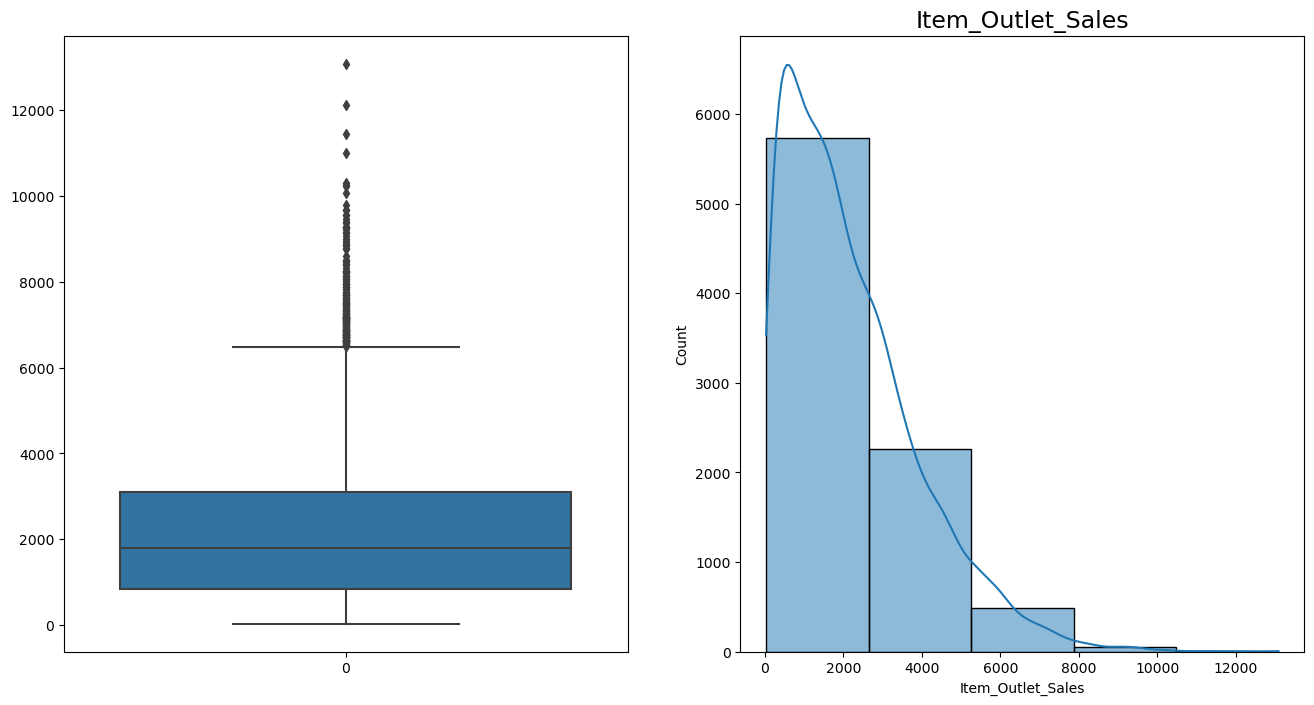

In [42]:
figs,axes = plt.subplots(1,2,figsize=(16,8))
plt.title('Item_Outlet_Sales',fontsize=17)
sns.boxplot(data_df['Item_Outlet_Sales'],ax=axes[0])
sns.histplot(data_df['Item_Outlet_Sales'],kde=True,ax=axes[1],bins=5)
plt.show()

### The Outlet Sales varies between 1500-2500.

## $$\;\;\;\;\;\;Bivariate \ Analysis \ of  \ Variables$$

# Categorical to Categorical 

### Item Fat with Item Type 

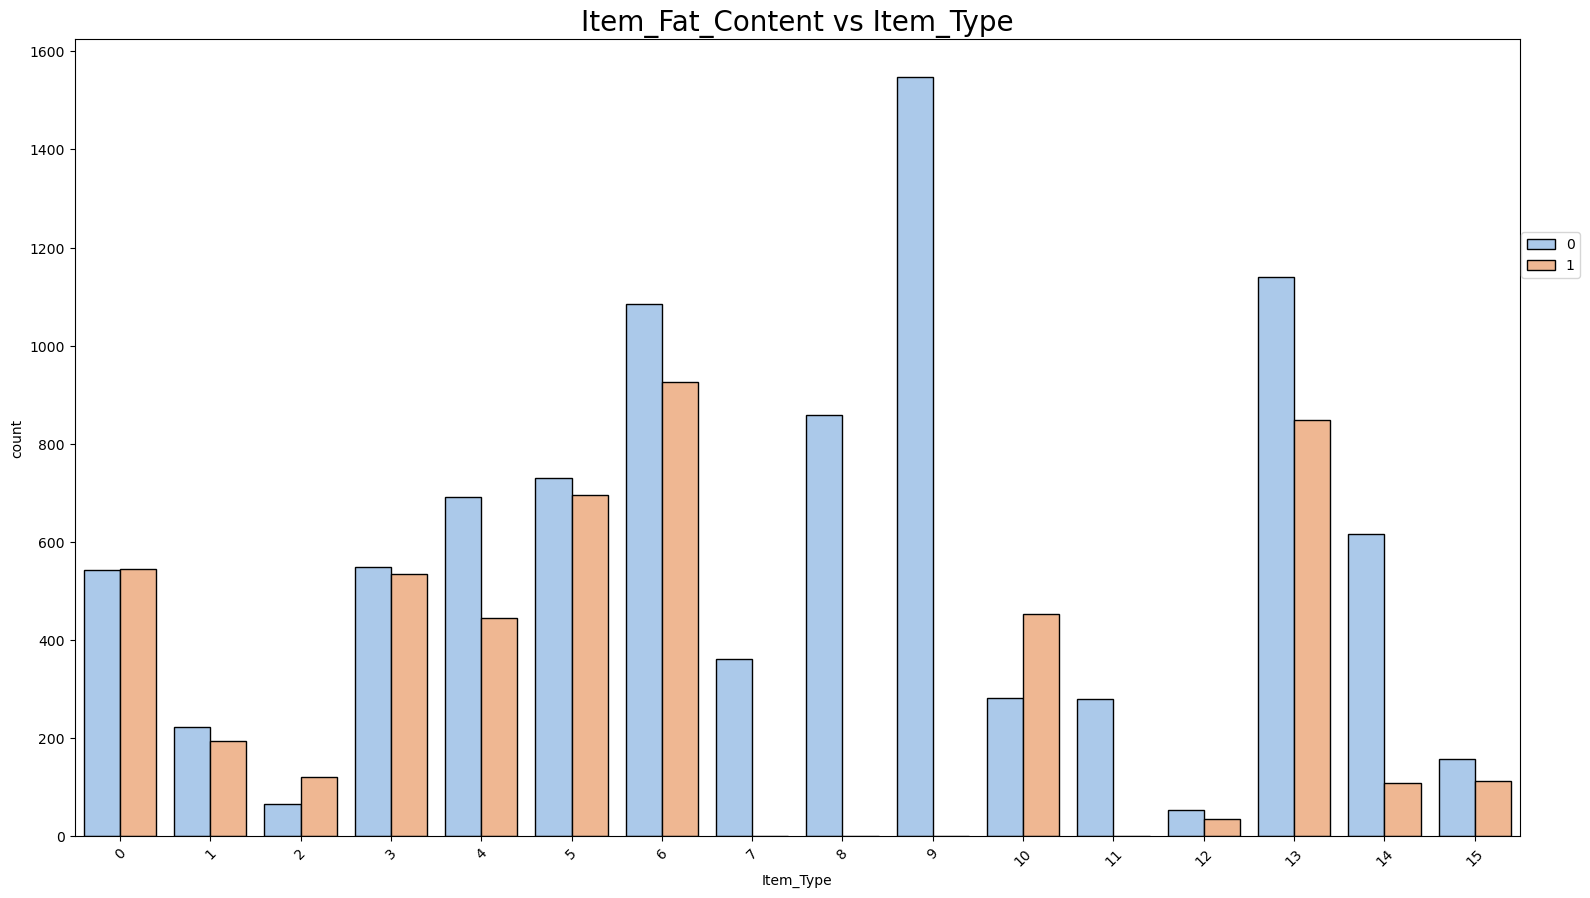

In [171]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.countplot(x = "Item_Type", hue = "Item_Fat_Content", data = data_df,palette='pastel',edgecolor='black')
plt.title('Item_Fat_Content vs Item_Type',fontsize=20)
plt.legend(loc=(1.001,0.7))
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### Item Fat Content Vs Outlet Location 

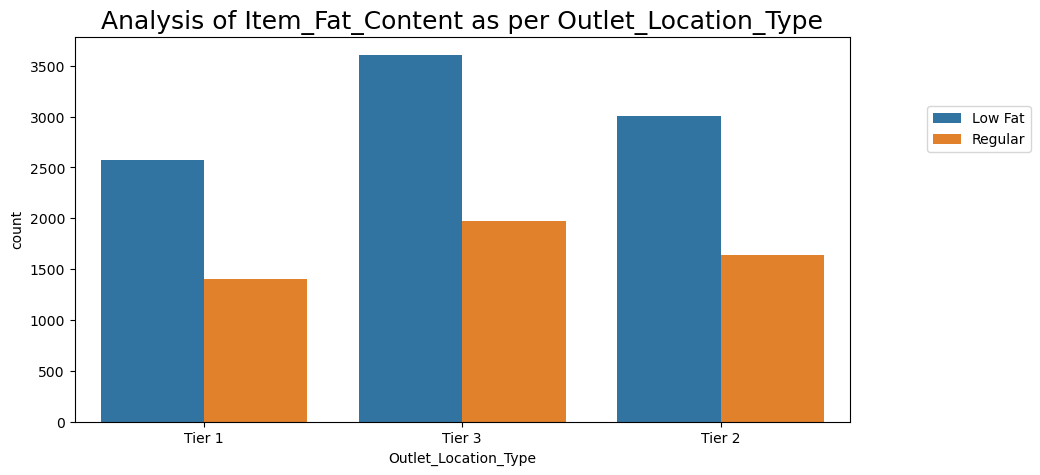

In [44]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('Analysis of Item_Fat_Content as per Outlet_Location_Type',fontsize=18)
sns.countplot(x = "Outlet_Location_Type", hue = "Item_Fat_Content", data = data_df)
plt.legend(loc=(1.1,0.7))
plt.show()

## Particulary stores sells low fat item , probably giving a idea of diversity that its not just a food store.

# Categorical to Continuous(Numerical)

In [45]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, FDA15 to FDU37
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                14204 non-null  float64
 1   Item_Fat_Content           14204 non-null  object 
 2   Item_Visibility            14204 non-null  float64
 3   Item_Type                  14204 non-null  object 
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Identifier          14204 non-null  object 
 6   Outlet_Establishment_Year  14204 non-null  int64  
 7   Outlet_Size                14204 non-null  object 
 8   Outlet_Location_Type       14204 non-null  object 
 9   Outlet_Type                14204 non-null  object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1.8+ MB


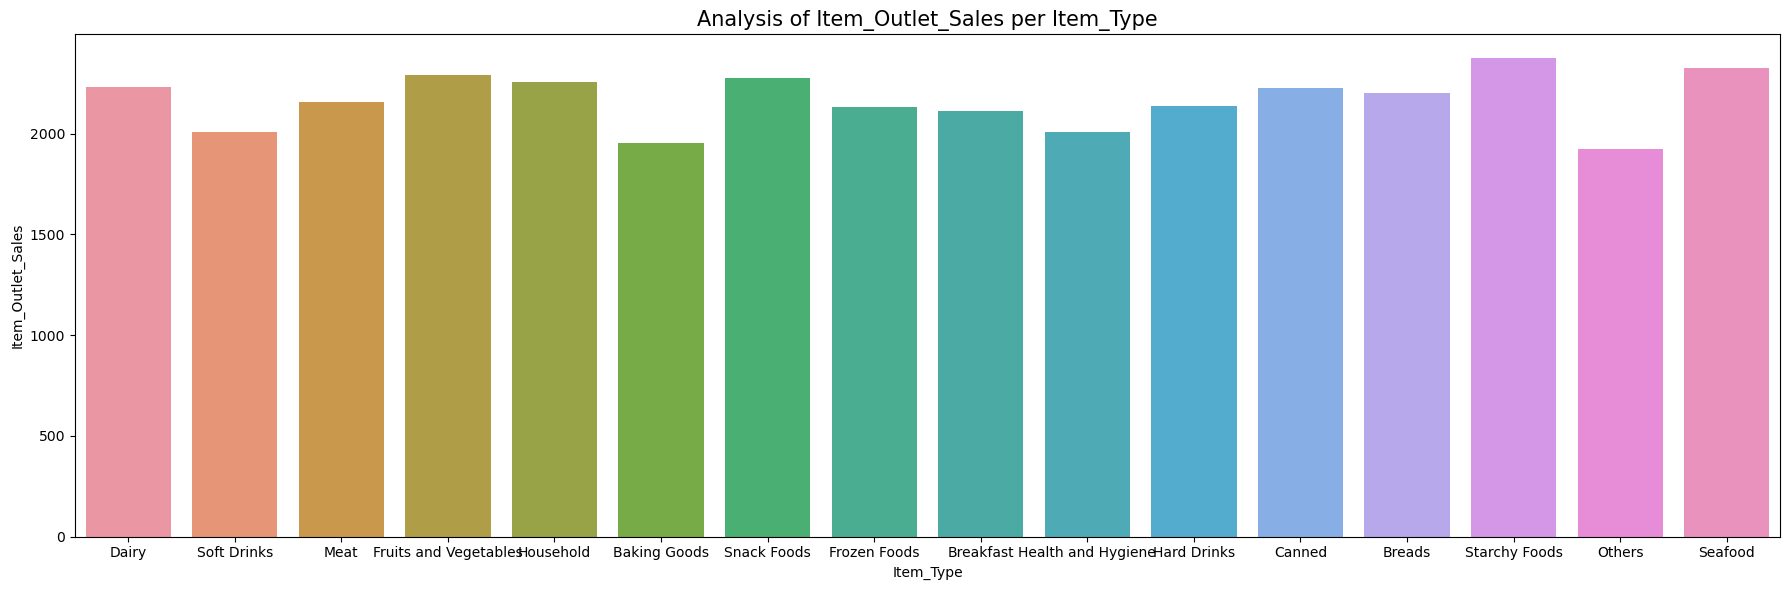

In [46]:
fig, ax = plt.subplots(figsize = (18, 6))
sns.barplot(data=data_df,y=data_df['Item_Outlet_Sales'],x=data_df['Item_Type'],ci=False)
plt.title('Analysis of Item_Outlet_Sales per Item_Type',fontsize=15)
plt.tight_layout()
plt.show()

### The Starchy foods,seafood,household,Fruits,Snacks does the good amount of sales.

We could work on improving freshness to these food types so sale increases more .

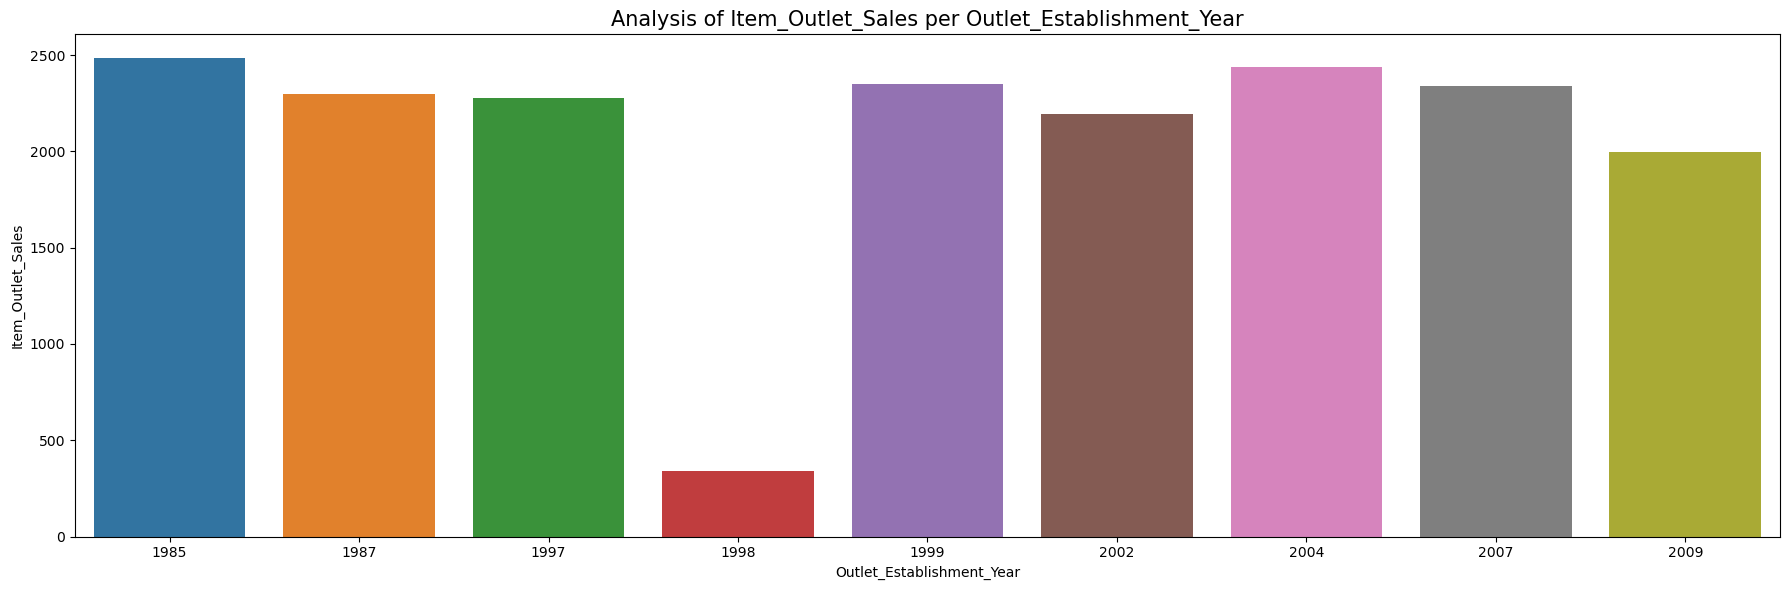

In [47]:
fig, ax = plt.subplots(figsize = (18, 6))
sns.barplot(data=data_df,y=data_df['Item_Outlet_Sales'],x=data_df['Outlet_Establishment_Year'],ci=False)
plt.title('Analysis of Item_Outlet_Sales per Outlet_Establishment_Year',fontsize=15)
plt.tight_layout()
plt.show()

### The year dont affect the sales as such 

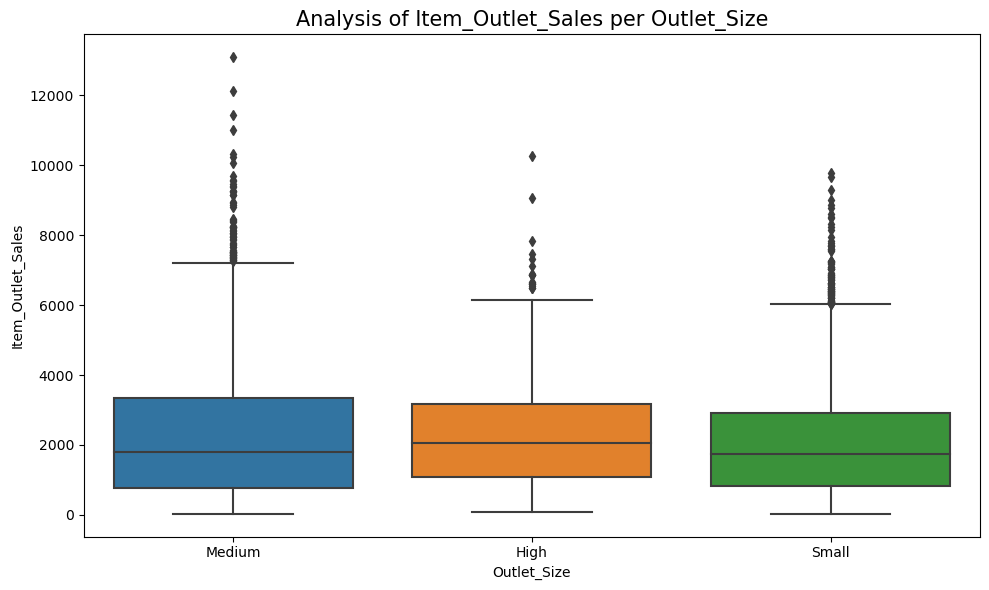

In [48]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(data=data_df,y=data_df['Item_Outlet_Sales'],x=data_df['Outlet_Size'])
plt.title('Analysis of Item_Outlet_Sales per Outlet_Size',fontsize=15)
plt.tight_layout()
plt.show()

### Size of outlet doesnt also signficantly affect sales but yeah does affect slightly .

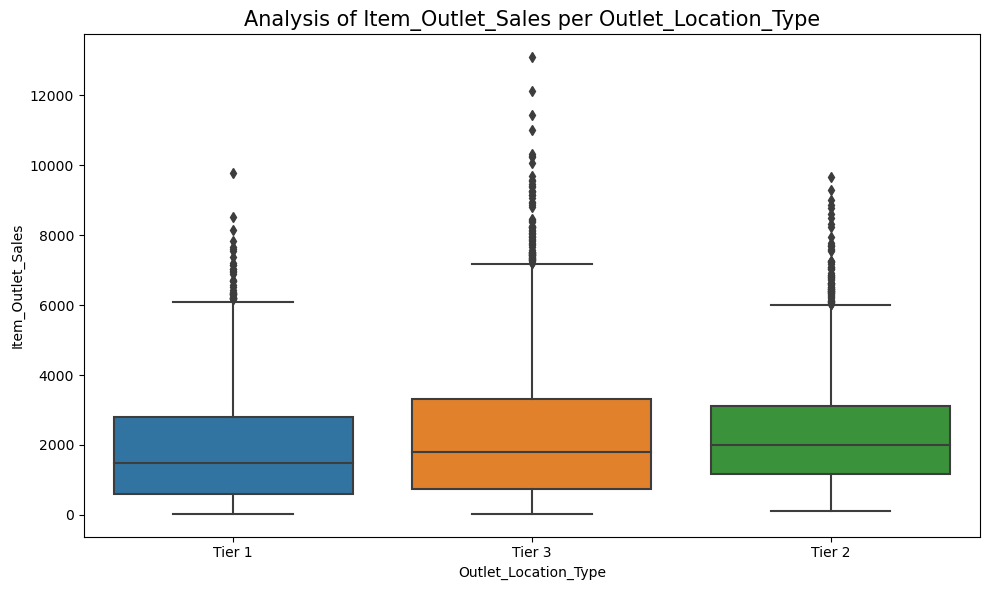

In [49]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(data=data_df,y=data_df['Item_Outlet_Sales'],x=data_df['Outlet_Location_Type'])
plt.title('Analysis of Item_Outlet_Sales per Outlet_Location_Type',fontsize=15)
plt.tight_layout()
plt.show()

### Tier 1 city have less sales, probably because of more competetion in city thats hampering sales.

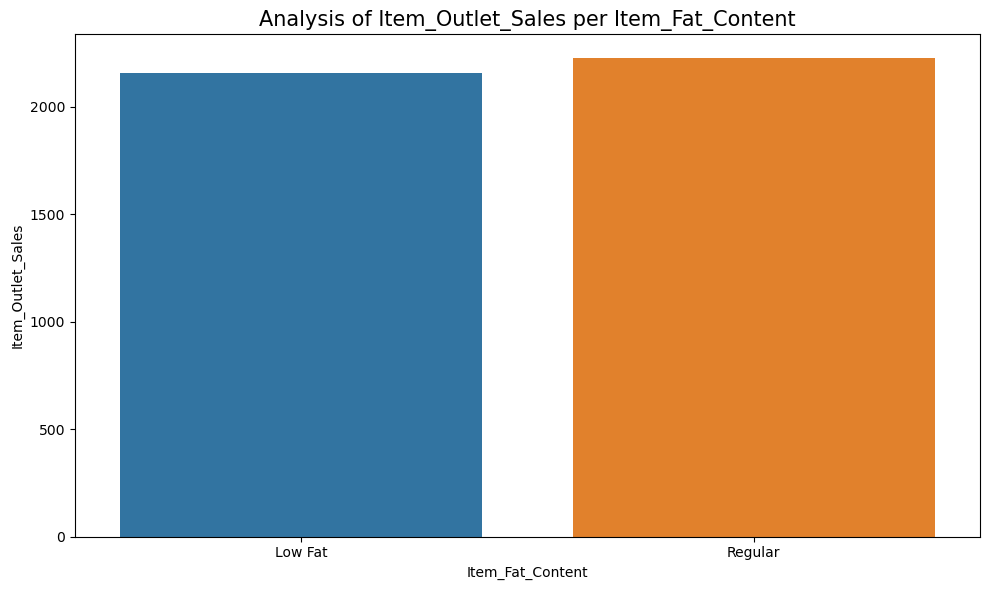

In [50]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(data=data_df,y=data_df['Item_Outlet_Sales'],x=data_df['Item_Fat_Content'],ci=False)
plt.title('Analysis of Item_Outlet_Sales per Item_Fat_Content',fontsize=15)
plt.tight_layout()
plt.show()

### No Such visible changes but yeah regular things are sold more.

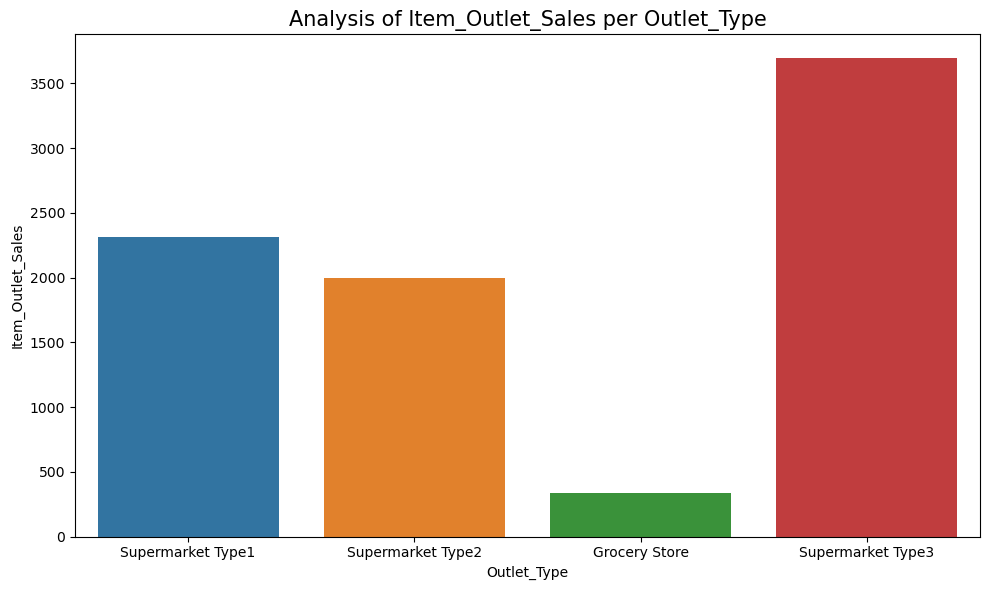

In [51]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(data=data_df,y=data_df['Item_Outlet_Sales'],x=data_df['Outlet_Type'],ci=False)
plt.title('Analysis of Item_Outlet_Sales per Outlet_Type',fontsize=15)
plt.tight_layout()
plt.show()

## Supermkarkets does more bussiness.

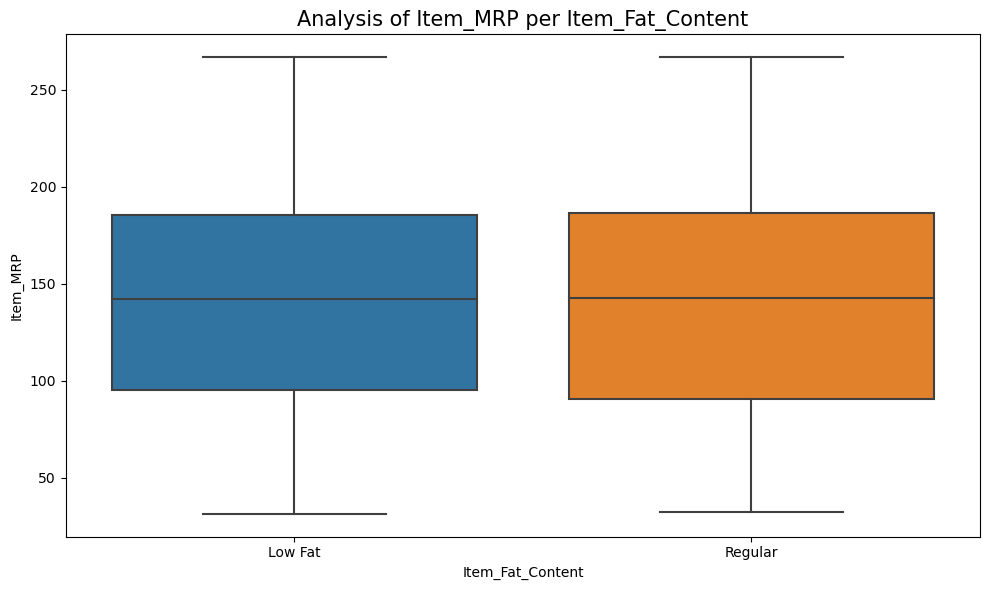

In [52]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(data=data_df,y=data_df['Item_MRP'],x=data_df['Item_Fat_Content'])
plt.title('Analysis of Item_MRP per Item_Fat_Content',fontsize=15)
plt.tight_layout()
plt.show()

### No visible changes 

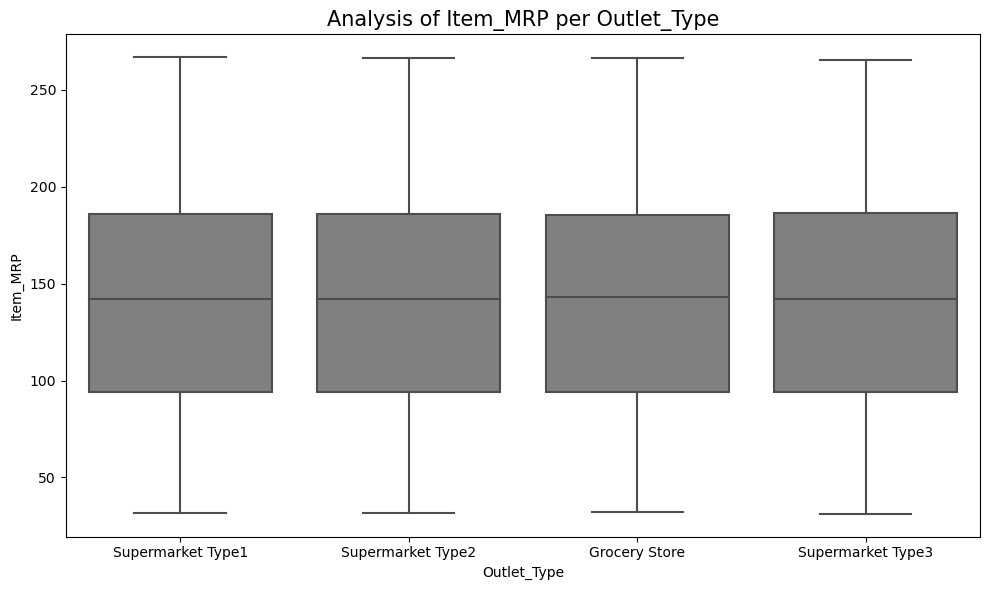

In [53]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(data=data_df,y=data_df['Item_MRP'],x=data_df['Outlet_Type'],color='grey')
plt.title('Analysis of Item_MRP per Outlet_Type',fontsize=15)
plt.tight_layout()
plt.show()

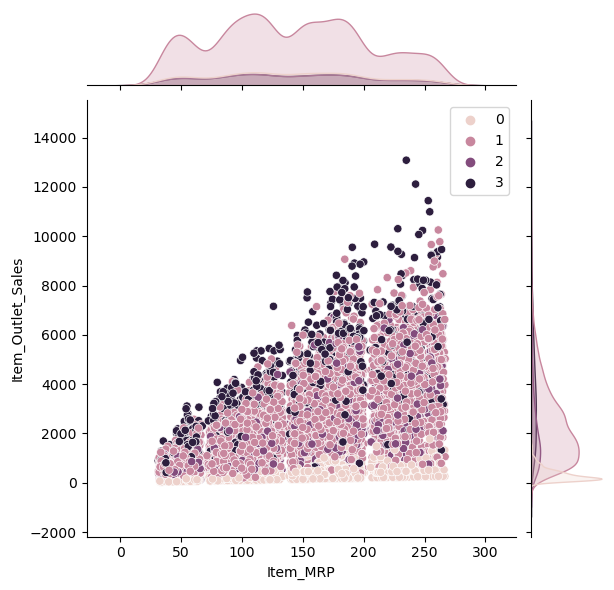

In [172]:
data=data_df.copy().reset_index()
#fig, ax = plt.subplots(figsize = (10, 6))
sns.jointplot(data=data,x='Item_MRP',y="Item_Outlet_Sales",hue='Outlet_Type')
plt.legend()

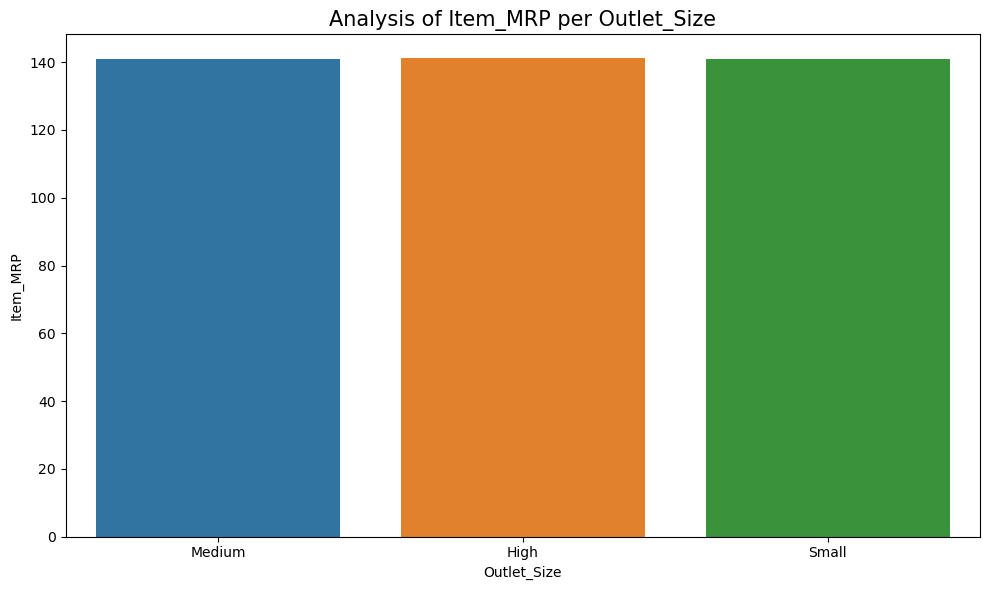

In [55]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(data=data_df,y=data_df['Item_MRP'],x=data_df['Outlet_Size'],ci=False)
plt.title('Analysis of Item_MRP per Outlet_Size',fontsize=15)
plt.tight_layout()
plt.show()

### Item MRP doesnt chnage and its a same .

# Continuous to Continuous

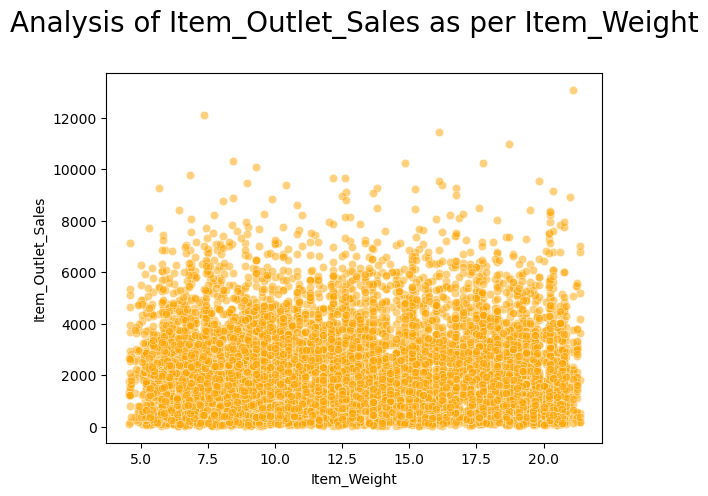

In [56]:
plt.title('Analysis of Item_Outlet_Sales as per Item_Weight\n',fontsize=20)
sns.scatterplot(y = "Item_Outlet_Sales", x = "Item_Weight", data = data_df,palette='magma',alpha=0.5,color='orange')
plt.show()

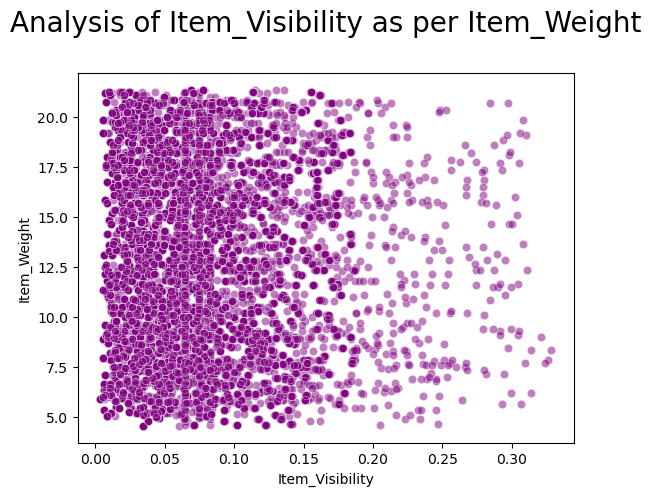

In [57]:
plt.title('Analysis of Item_Visibility as per Item_Weight\n',fontsize=20)
sns.scatterplot(x = "Item_Visibility", y = "Item_Weight", data = data_df,palette='magma',alpha=0.5,color='purple')
plt.show()

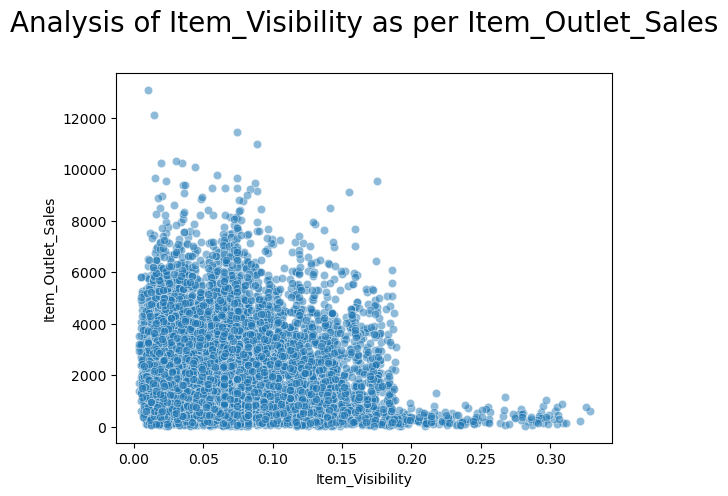

In [58]:
plt.title('Analysis of Item_Visibility as per Item_Outlet_Sales\n',fontsize=20)
sns.scatterplot(x = "Item_Visibility", y = "Item_Outlet_Sales", data = data_df,palette='magma',alpha=0.5)
plt.show()

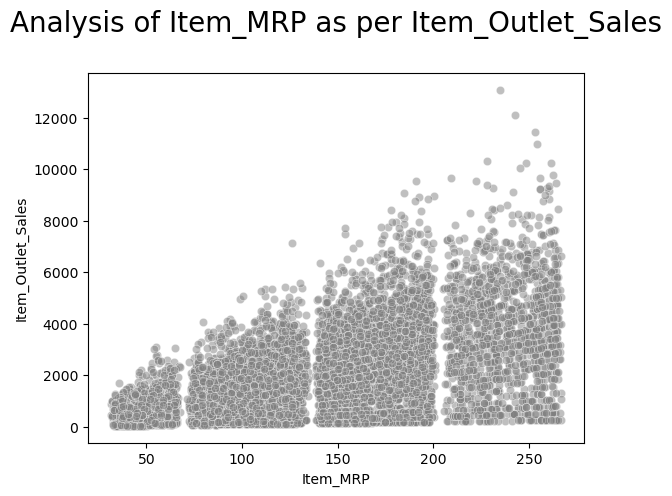

In [59]:
plt.title('Analysis of Item_MRP as per Item_Outlet_Sales\n',fontsize=20)
sns.scatterplot(x = "Item_MRP", y = "Item_Outlet_Sales", data = data_df,palette='magma',alpha=0.5,color='grey')
plt.show()

# Pairplot

In [60]:
data2=data_df.copy()
data2=data2.reset_index()

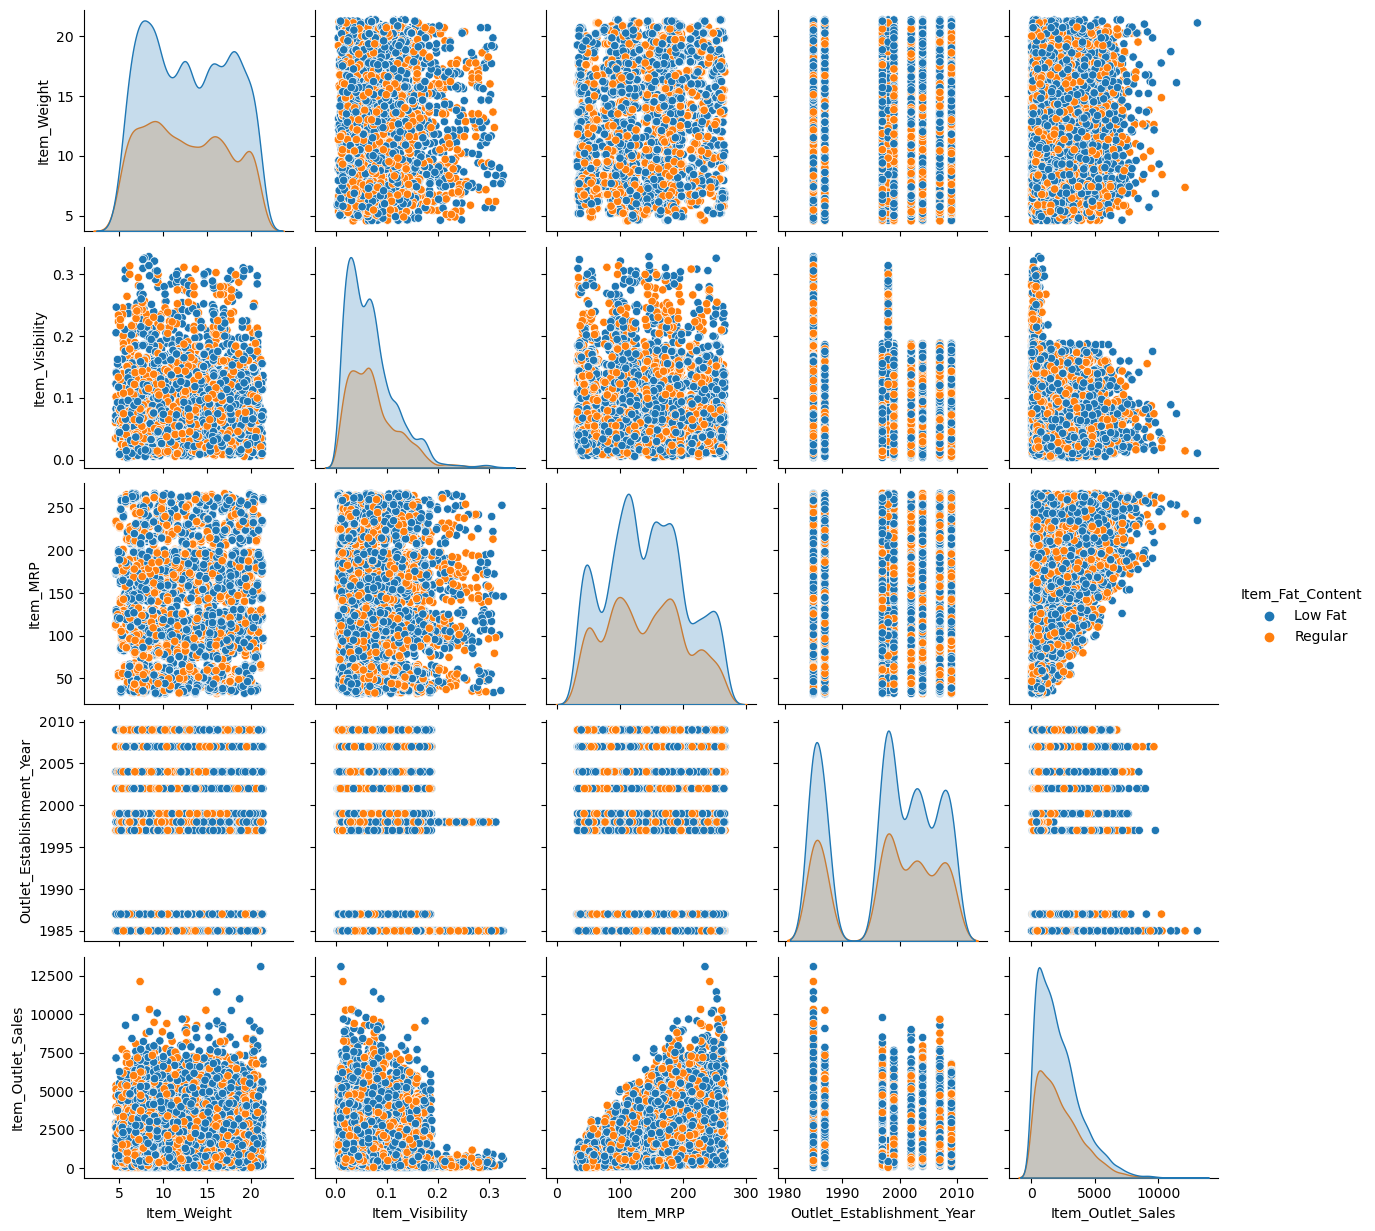

In [61]:
sns.pairplot(data=data2,diag_kind='kde',hue='Item_Fat_Content');

## Corelation 

In [62]:
corr=data_df.corr()['Item_Outlet_Sales']
corr.sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.013261
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.135247
Name: Item_Outlet_Sales, dtype: float64

## Heatmap 

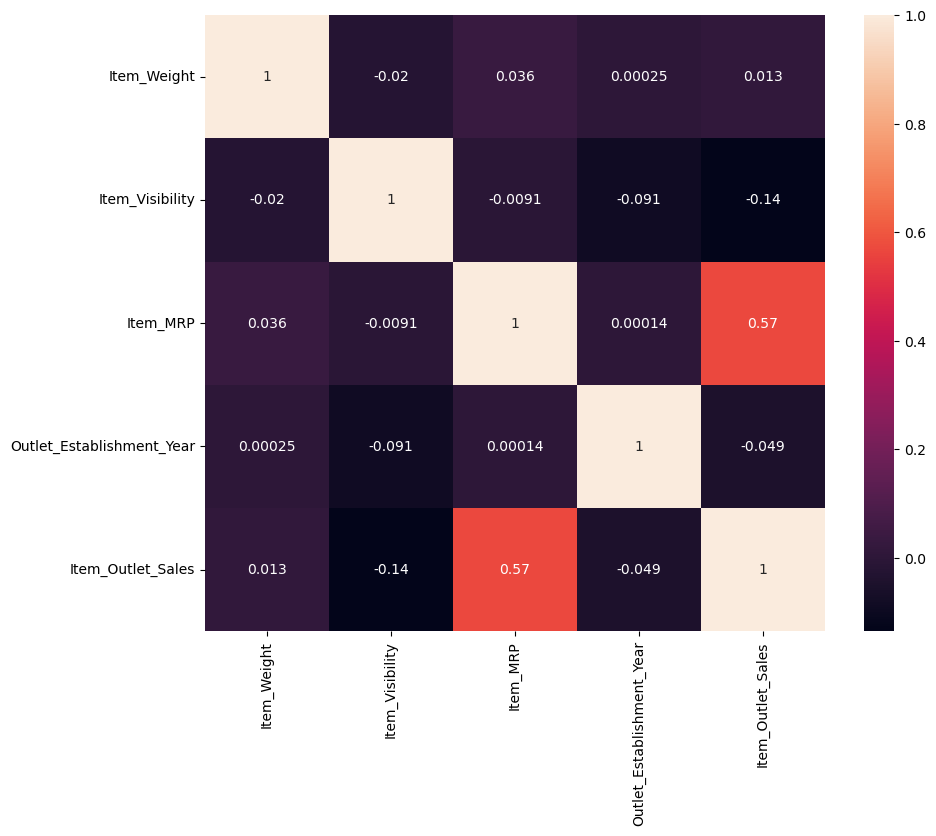

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(data_df.corr(),annot=True);

# Preprocessing 

## Label Encoding 

In [64]:
for i in data_df.columns:
    if data_df[i].nunique()<50:
        print(i,':',data_df[i].unique())

Item_Fat_Content : ['Low Fat' 'Regular']
Item_Type : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier : ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Establishment_Year : [1999 2009 1998 1987 1985 2002 2007 1997 2004]
Outlet_Size : ['Medium' 'High' 'Small']
Outlet_Location_Type : ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
label=LabelEncoder()

In [67]:
data_df['Item_Fat_Content']=label.fit_transform(data_df['Item_Fat_Content'])
data_df['Item_Type']=label.fit_transform(data_df['Item_Type'])
data_df['Outlet_Identifier']=label.fit_transform(data_df['Outlet_Identifier'])
data_df['Outlet_Size']=label.fit_transform(data_df['Outlet_Size'])
data_df['Outlet_Location_Type']=label.fit_transform(data_df['Outlet_Location_Type'])
data_df['Outlet_Type']=label.fit_transform(data_df['Outlet_Type'])
data_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
FDX07,19.20,1,0.074402,6,182.0950,0,1998,1,2,0,732.3800
NCD19,8.93,0,0.064299,9,53.8614,1,1987,0,2,1,994.7052


# Validation Dataset

In [68]:
validate_data=data_df.loc[data_df['Item_Outlet_Sales'].isnull(),:]
validate_data.head()
validate_data.shape
validate_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDW58,20.750,0,0.007565,13,107.8622,9,1999,1,0,1,NaN
FDW14,8.300,1,0.038428,4,87.3198,2,2007,2,1,1,NaN
NCN55,14.600,0,0.099575,11,241.7538,0,1998,1,2,0,NaN
FDQ58,7.315,0,0.015388,13,155.0340,2,2007,2,1,1,NaN
FDY38,13.600,1,0.118599,4,234.2300,5,1985,1,2,3,NaN


# Test | Train Dataset 

In [69]:
data=data_df.loc[data_df['Item_Outlet_Sales'].notna(),:]
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
FDX07,19.20,1,0.074402,6,182.0950,0,1998,1,2,0,732.3800
NCD19,8.93,0,0.064299,9,53.8614,1,1987,0,2,1,994.7052


In [70]:
data.shape

(8523, 11)

In [71]:
X=data.drop(columns='Item_Outlet_Sales')
y=data['Item_Outlet_Sales']

# Scaling 

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scale=StandardScaler()

In [74]:
X1=X.copy()
X2=scale.fit_transform(X1)
X=pd.DataFrame(X2,columns=X1.columns)
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.769246,-0.738147,-1.116357,-0.766479,1.747454,1.507813,0.139541,-0.575119,-1.369334,-0.252658
1,-1.496813,1.354743,-1.050092,1.608963,-1.489023,-0.607071,1.334103,-0.575119,1.091569,1.002972
2,0.995858,-0.738147,-1.101738,0.658786,0.010040,1.507813,0.139541,-0.575119,-1.369334,-0.252658
3,1.361794,1.354743,0.080475,-0.291391,0.660050,-1.664513,0.020085,-0.575119,1.091569,-1.508289
4,-0.848890,-0.738147,-0.126740,0.421242,-1.399220,-1.312032,-1.293934,-2.055561,1.091569,-0.252658


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=7)
print(x_train.shape)
print(x_test.shape)

(5966, 10)
(2557, 10)


# Model Building 

Importing various Other Models .

In [77]:
names=[]
result=[]

In [78]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [79]:
def error(x,y):
    print('ERRORS')
    print('MAE is :',mean_absolute_error(x,y))
    print('MSE is :',mean_squared_error(x,y))
    rmse=np.sqrt(mean_squared_error(x,y))
    print('RMSE is :',rmse)

# Linear Regression 

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
model_linear=LinearRegression()

In [82]:
names.append(model_linear)
model_linear.fit(x_train,y_train)

LinearRegression()

 Score or Efficiency 

In [83]:
model_linear.score(x_test,y_test)
result.append(model_linear.score(x_test,y_test))
model_linear.score(x_test,y_test)

0.4929601449378269

Intercept

In [84]:
model_linear.intercept_

2190.684887149874

Slope 

In [85]:
model_linear.coef_

array([ -6.36781257,  29.90566909, -85.66406109,   3.73791455,
       977.63461008, 153.40174019, -17.90040022, -12.72918158,
       -64.89152574, 688.56529534])

### Important Fetaures 

In [86]:
pd.DataFrame(model_linear.coef_.reshape(-1,1),columns=['slope'],index=X.columns).sort_values(by='slope',ascending=False)

,slope
Item_MRP,977.634610
Outlet_Type,688.565295
Outlet_Identifier,153.401740
Item_Fat_Content,29.905669
Item_Type,3.737915
Item_Weight,-6.367813
Outlet_Size,-12.729182
Outlet_Establishment_Year,-17.900400
Outlet_Location_Type,-64.891526
Item_Visibility,-85.664061


### Predict 

In [87]:
y_pred=model_linear.predict(x_test)

Errors

In [88]:
error(y_test,y_pred)

ERRORS
MAE is : 911.6010104038803
MSE is : 1493299.4470670056
RMSE is : 1222.0063203875034


### Plot 

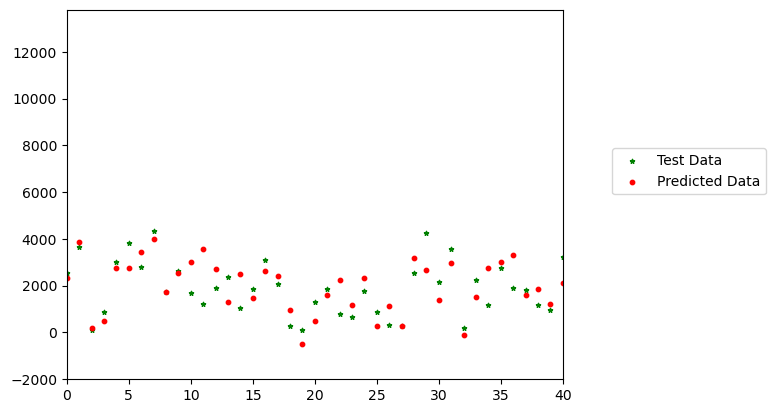

In [89]:
plt.scatter(range(len(y_test)),y_test,s=10,marker='*',c='green',label='Test Data')
plt.scatter(range(len(y_test)),y_pred,s=10,marker='o',c='red',label='Predicted Data')
plt.xlim(0,40)
plt.legend(loc=(1.1,0.5))
plt.show()

# Ridge  

In [90]:
from sklearn.model_selection import KFold

In [91]:
kfold=KFold(n_splits=5,shuffle=True,random_state=7)

In [92]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [93]:
params={
    'alpha':[0.5,0.7,0.8,1,2,3,5,7,8,9,10,14]
}

In [94]:
model_ridge=Ridge()
names.append(Ridge)

In [95]:
grid=GridSearchCV(estimator=model_ridge,param_grid=params,n_jobs=-1,verbose=0,cv=kfold)

In [96]:
grid.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.5, 0.7, 0.8, 1, 2, 3, 5, 7, 8, 9, 10, 14]})

In [97]:
grid.best_score_

0.5041535234781861

In [98]:
best_ridge=grid.best_estimator_
best_ridge

Ridge(alpha=7)

In [99]:
result.append(best_ridge.score(x_test,y_test))
best_ridge.score(x_test,y_test)

0.49299427994288403

In [100]:
y_ridge=best_ridge.predict(x_test)

Error 

In [101]:
error(y_test,y_ridge)

ERRORS
MAE is : 911.4896650236511
MSE is : 1493198.9149615539
RMSE is : 1221.9651856585579


# SVR

In [102]:
from sklearn.svm import SVR

In [103]:
model_svr=SVR()

In [104]:
names.append(model_svr)
model_svr.fit(x_train,y_train)

SVR()

In [105]:
result.append(model_svr.score(x_test,y_test))
model_svr.score(x_test,y_test)

0.049937596028189146

In [106]:
y_svr=model_svr.predict(x_test)

In [107]:
error(y_test,y_svr)

ERRORS
MAE is : 1216.6706856132575
MSE is : 2798059.4589675623
RMSE is : 1672.740105027545


# Decision Tree 

In [108]:
from sklearn.tree import DecisionTreeRegressor

In [109]:
model_tree=DecisionTreeRegressor()

In [110]:
names.append(model_tree)

In [111]:
params={
    'max_depth':[2,3,4,5,6,7,9],
    'min_samples_split':[2,3,4,6,9,10],
    'min_samples_leaf':[1,2,3,4,5,6,10],
    
    'max_features':[3,4,7,9,10]
}

In [112]:
grid_tree=GridSearchCV(model_tree,param_grid=params,cv=kfold,n_jobs=-1,verbose=0)

In [113]:
grid_tree.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 9],
                         'max_features': [3, 4, 7, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 10],
                         'min_samples_split': [2, 3, 4, 6, 9, 10]})

In [114]:
grid_tree.best_score_

0.5977487691784784

In [115]:
grid_tree.best_params_

{'max_depth': 5,
 'max_features': 9,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [116]:
best_tree=grid_tree.best_estimator_

In [117]:
result.append(best_tree.score(x_test,y_test))
best_tree.score(x_test,y_test)

0.5724208081907918

In [118]:
best_tree.feature_importances_

array([1.67123421e-05, 0.00000000e+00, 8.90723025e-05, 6.27120423e-05,
       5.38610342e-01, 1.34956878e-01, 7.53838127e-03, 0.00000000e+00,
       0.00000000e+00, 3.18725901e-01])

In [119]:
imp_df = pd.DataFrame({
 "Varname": X.columns,
 "Imp": best_tree.feature_importances_
})
imp_df.sort_values(by='Imp',ascending=False,ignore_index=True)

,Varname,Imp
0,Item_MRP,0.538610
1,Outlet_Type,0.318726
2,Outlet_Identifier,0.134957
3,Outlet_Establishment_Year,0.007538
4,Item_Visibility,0.000089
5,Item_Type,0.000063
6,Item_Weight,0.000017
7,Item_Fat_Content,0.000000
8,Outlet_Size,0.000000
9,Outlet_Location_Type,0.000000


In [120]:
y_tree=best_tree.predict(x_test)

In [121]:
error(y_test,y_tree)

ERRORS
MAE is : 779.9227562883323
MSE is : 1259277.2823109827
RMSE is : 1122.175245811002


In [122]:
from sklearn.inspection import permutation_importance

# Random Forest 

In [123]:
from sklearn.ensemble import RandomForestRegressor

In [124]:
model_random=RandomForestRegressor()

In [125]:
names.append(model_random)

In [126]:
params = {
          'max_depth': [2,3,5,10,20],
          'min_samples_leaf': [5,10,20,50,100,200],
          'n_estimators': [10,25,30,50,100,200]
          }

In [127]:
grid_random = GridSearchCV(estimator=model_random,
                           param_grid=params,
                           cv = kfold,
                           n_jobs=-1, verbose=2, scoring="r2")

In [128]:
grid_random.fit(x_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='r2', verbose=2)

In [129]:
grid_random.best_score_

0.6033313673543609

In [130]:
grid_random.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 100}

In [131]:
best_grid=grid_random.best_estimator_

In [132]:
result.append(best_grid.score(x_test,y_test))
best_grid.score(x_test,y_test)

0.5813702549484963

In [133]:
best_grid.feature_importances_

array([1.89365387e-03, 2.88794875e-04, 1.60061312e-03, 1.73360594e-03,
       5.46381801e-01, 3.73742358e-06, 4.54478343e-02, 7.22024110e-05,
       3.67394277e-05, 4.02541018e-01])

In [134]:
imp_df = pd.DataFrame({
 "Varname": X.columns,
 "Imp": best_grid.feature_importances_
})
imp_df.sort_values(by='Imp',ascending=False,ignore_index=True)

,Varname,Imp
0,Item_MRP,0.546382
1,Outlet_Type,0.402541
2,Outlet_Establishment_Year,0.045448
3,Item_Weight,0.001894
4,Item_Type,0.001734
5,Item_Visibility,0.001601
6,Item_Fat_Content,0.000289
7,Outlet_Size,0.000072
8,Outlet_Location_Type,0.000037
9,Outlet_Identifier,0.000004


In [135]:
y_grid=best_grid.predict(x_test)

In [136]:
error(y_test,y_grid)

ERRORS
MAE is : 768.8689801614252
MSE is : 1232919.9777294777
RMSE is : 1110.3692979047455


# Adaboost 

In [137]:
from sklearn.ensemble import AdaBoostRegressor

In [138]:
cv=KFold(n_splits=7,random_state=7,shuffle=True)

In [139]:
model_ada=AdaBoostRegressor(n_estimators=100)

In [140]:
names.append(model_ada)

In [141]:
model_ada.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=100)

In [142]:
result.append(model_ada.score(x_test,y_test))
model_ada.score(x_test,y_test)

0.5167449747940296

In [143]:
model_ada.feature_importances_

array([0.01781766, 0.01019068, 0.04941433, 0.02792943, 0.58710889,
       0.00313046, 0.03289937, 0.        , 0.00896783, 0.26254134])

In [144]:
imp_df = pd.DataFrame({
 "Varname": X.columns,
 "Imp": model_ada.feature_importances_
})
imp_df.sort_values(by='Imp',ascending=False,ignore_index=True)

,Varname,Imp
0,Item_MRP,0.587109
1,Outlet_Type,0.262541
2,Item_Visibility,0.049414
3,Outlet_Establishment_Year,0.032899
4,Item_Type,0.027929
5,Item_Weight,0.017818
6,Item_Fat_Content,0.010191
7,Outlet_Location_Type,0.008968
8,Outlet_Identifier,0.003130
9,Outlet_Size,0.000000


In [145]:
y_ada=model_ada.predict(x_test)

In [146]:
error(y_test,y_ada)

ERRORS
MAE is : 889.5260794042032
MSE is : 1423249.9767576254
RMSE is : 1193.0004093702673


# Stacking 

In [147]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

In [148]:
def get_stack():
    level0=list()
    level0.append(('cart',DecisionTreeRegressor()))
    level0.append(('svm',SVR()))
    level0.append(('knn',KNeighborsRegressor()))
    level0.append(('Boost',AdaBoostRegressor()))
    level0.append(('Bag',RandomForestRegressor()))
    
    level1=LinearRegression()

    model=StackingRegressor(estimators=level0,final_estimator=level1,cv=kfold)
    return model

In [149]:
model=get_stack()
model

StackingRegressor(cv=KFold(n_splits=5, random_state=7, shuffle=True),
                  estimators=[('cart', DecisionTreeRegressor()), ('svm', SVR()),
                              ('knn', KNeighborsRegressor()),
                              ('Boost', AdaBoostRegressor()),
                              ('Bag', RandomForestRegressor())],
                  final_estimator=LinearRegression())

In [150]:
names.append(StackingRegressor)

In [151]:
model.fit(x_train,y_train)

StackingRegressor(cv=KFold(n_splits=5, random_state=7, shuffle=True),
                  estimators=[('cart', DecisionTreeRegressor()), ('svm', SVR()),
                              ('knn', KNeighborsRegressor()),
                              ('Boost', AdaBoostRegressor()),
                              ('Bag', RandomForestRegressor())],
                  final_estimator=LinearRegression())

In [152]:
result.append(model.score(x_test,y_test))
model.score(x_test,y_test)

0.5724392276814936

# Combining Result for each of the Algorithms on Test Data 

In [153]:
names

[LinearRegression(),
 sklearn.linear_model._ridge.Ridge,
 SVR(),
 DecisionTreeRegressor(),
 RandomForestRegressor(),
 AdaBoostRegressor(n_estimators=100),
 sklearn.ensemble._stacking.StackingRegressor]

In [154]:
result

[0.4929601449378269,
 0.49299427994288403,
 0.049937596028189146,
 0.5724208081907918,
 0.5813702549484963,
 0.5167449747940296,
 0.5724392276814936]

In [155]:
pd.DataFrame({'Model':names,'Score':result})

,Model,Score
0,LinearRegression(),0.492960
1,<class 'sklearn.linear_model._ridge.Ridge'>,0.492994
2,SVR(),0.049938
3,DecisionTreeRegressor(),0.572421
4,RandomForestRegressor(),0.581370
5,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.516745
6,<class 'sklearn.ensemble._stacking.StackingReg...,0.572439


# We can see that the R2 Value of the Random Forest is higher so we will use that model to predict the values 

In [156]:
best_grid

RandomForestRegressor(max_depth=5, min_samples_leaf=5)

# This is the best model 

Finding the score on train data set 

In [157]:
best_grid.score(x_train,y_train)

0.6182384499071099

In [158]:
best_grid.oob_score

False

In [159]:
best_grid.feature_importances_

array([1.89365387e-03, 2.88794875e-04, 1.60061312e-03, 1.73360594e-03,
       5.46381801e-01, 3.73742358e-06, 4.54478343e-02, 7.22024110e-05,
       3.67394277e-05, 4.02541018e-01])

# Most Important Features 

In [160]:
imp_df = pd.DataFrame({
 "Varname": X.columns,
 "Imp": best_grid.feature_importances_
})
imp_df.sort_values(by='Imp',ascending=False,ignore_index=True)

,Varname,Imp
0,Item_MRP,0.546382
1,Outlet_Type,0.402541
2,Outlet_Establishment_Year,0.045448
3,Item_Weight,0.001894
4,Item_Type,0.001734
5,Item_Visibility,0.001601
6,Item_Fat_Content,0.000289
7,Outlet_Size,0.000072
8,Outlet_Location_Type,0.000037
9,Outlet_Identifier,0.000004


# Predicting

In [161]:
y_predict=best_grid.predict(x_test)

Error 

In [162]:
error(y_test,y_predict)

ERRORS
MAE is : 768.8689801614252
MSE is : 1232919.9777294777
RMSE is : 1110.3692979047455


# Plot 

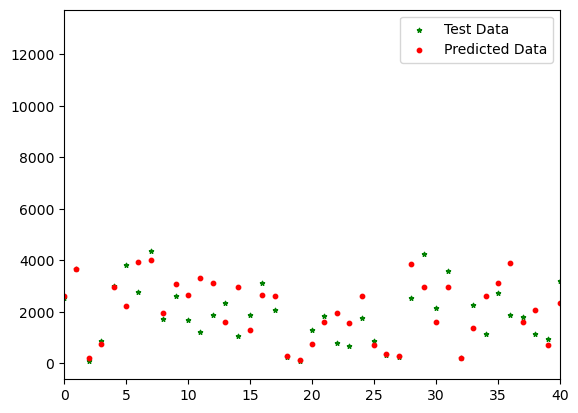

In [163]:
plt.scatter(range(len(y_test)),y_test,s=10,marker='*',c='green',label='Test Data')
plt.scatter(range(len(y_test)),y_predict,c='red',s=10,marker='o',label='Predicted Data')
plt.xlim(0,40)
plt.legend()
plt.show()

# Validation Data 

In [164]:
validate_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDW58,20.750,0,0.007565,13,107.8622,9,1999,1,0,1,NaN
FDW14,8.300,1,0.038428,4,87.3198,2,2007,2,1,1,NaN
NCN55,14.600,0,0.099575,11,241.7538,0,1998,1,2,0,NaN
FDQ58,7.315,0,0.015388,13,155.0340,2,2007,2,1,1,NaN
FDY38,13.600,1,0.118599,4,234.2300,5,1985,1,2,3,NaN


In [165]:
val_test=validate_data.drop(columns='Item_Outlet_Sales')

In [166]:
val=val_test.copy()
val1=scale.fit_transform(val)
val_test=pd.DataFrame(val1,columns=val.columns)
val_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1.734064,-0.740811,-1.290427,1.366916,-0.536555,1.507689,0.139891,-0.575182,-1.369215,-0.252769
1,-0.938845,1.349873,-0.652892,-0.766450,-0.868937,-0.959749,1.095512,0.905384,-0.138827,-0.252769
2,0.413711,-0.740811,0.610230,0.892835,1.629848,-1.664731,0.020438,-0.575182,1.091560,-1.507994
3,-1.150316,-0.740811,-1.128815,1.366916,0.226697,-0.959749,1.095512,0.905384,-0.138827,-0.252769
4,0.199020,1.349873,1.003218,-0.766450,1.508110,0.097725,-1.532446,-0.575182,1.091560,2.257683


In [167]:
val_predict=best_grid.predict(val_test)

In [168]:
val_test['Item_Outlet_Sales']=val_predict
val_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1.734064,-0.740811,-1.290427,1.366916,-0.536555,1.507689,0.139891,-0.575182,-1.369215,-0.252769,1604.292042
1,-0.938845,1.349873,-0.652892,-0.766450,-0.868937,-0.959749,1.095512,0.905384,-0.138827,-0.252769,1286.481787
2,0.413711,-0.740811,0.610230,0.892835,1.629848,-1.664731,0.020438,-0.575182,1.091560,-1.507994,623.303087
3,-1.150316,-0.740811,-1.128815,1.366916,0.226697,-0.959749,1.095512,0.905384,-0.138827,-0.252769,2550.160864
4,0.199020,1.349873,1.003218,-0.766450,1.508110,0.097725,-1.532446,-0.575182,1.091560,2.257683,5909.699158


In [169]:
validate_data['Item_Outlet_Sales']=val_predict
validate_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDW58,20.750,0,0.007565,13,107.8622,9,1999,1,0,1,1604.292042
FDW14,8.300,1,0.038428,4,87.3198,2,2007,2,1,1,1286.481787
NCN55,14.600,0,0.099575,11,241.7538,0,1998,1,2,0,623.303087
FDQ58,7.315,0,0.015388,13,155.0340,2,2007,2,1,1,2550.160864
FDY38,13.600,1,0.118599,4,234.2300,5,1985,1,2,3,5909.699158
